In [1]:
import pandas as pd
import numpy as np
import copy
from Codebase import Valuestandard
from collections import Counter

In [2]:
training_data = pd.read_csv("[1]DATA/[2]Training_and_Testing_Set/training.csv")
testing_data = pd.read_csv("[1]DATA/[2]Training_and_Testing_Set/testing.csv")

training_data.info()
print(' ')
print('=========================================== ')
print(' ')
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  928 non-null    int64  
 1   Number                      928 non-null    int64  
 2   Age                         928 non-null    int64  
 3   Gender                      928 non-null    int64  
 4   Height                      928 non-null    int64  
 5   Weight                      928 non-null    int64  
 6   BMI                         928 non-null    float64
 7   Hypertesion                 928 non-null    int64  
 8   Diabetes                    928 non-null    int64  
 9   CI                          928 non-null    int64  
 10  CHD                         928 non-null    int64  
 11  Asthma                      928 non-null    int64  
 12  Hypothyroidism              928 non-null    int64  
 13  COPD                        928 non

In [4]:
# 拆分标签

"""术中低氧"""
# 术前变量
x_train_1 = copy.deepcopy(training_data[["BMI","Snore","Neck_Circumference","ASA_scores","TMD","RHTMD","TMH","Mallampati_Class","BaselineSpO2"]])
y_train_1 = copy.deepcopy(training_data["Label_Intraoperative"])
x_test_1 = copy.deepcopy(testing_data[["BMI","Snore","Neck_Circumference","ASA_scores","TMD","RHTMD","TMH","Mallampati_Class","BaselineSpO2"]])
y_test_1 = copy.deepcopy(testing_data["Label_Intraoperative"])

# 术前+术中变量
x_train_2 = copy.deepcopy(training_data[["Age","BMI","Neck_Circumference","ASA_scores","TMD","TMH","SMD","Mallampati_Class","BaselineSpO2","GIT","Operating_Time","Induction_propofol_dose","Total_propofol_dose"]])
y_train_2 = copy.deepcopy(training_data["Label_Intraoperative"])
x_test_2 = copy.deepcopy(testing_data[["Age","BMI","Neck_Circumference","ASA_scores","TMD","TMH","SMD","Mallampati_Class","BaselineSpO2","GIT","Operating_Time","Induction_propofol_dose","Total_propofol_dose"]])
y_test_2 = copy.deepcopy(testing_data["Label_Intraoperative"])

"""诱导低氧"""
# 术前变量
x_train_3 = copy.deepcopy(training_data[["BMI","Neck_Circumference","ASA_scores","TMD","RHTMD","TMH","RHSMD","Mallampati_Class","BaselineSpO2"]])
y_train_3 = copy.deepcopy(training_data["Label_Induction"])
x_test_3 = copy.deepcopy(testing_data[["BMI","Neck_Circumference","ASA_scores","TMD","RHTMD","TMH","RHSMD","Mallampati_Class","BaselineSpO2"]])
y_test_3 = copy.deepcopy(testing_data["Label_Induction"])

# 术前+诱导变量
x_train_4 = copy.deepcopy(training_data[["Age","BMI","Neck_Circumference","TMD","TMH","SMD","RHSMD","Mallampati_Class","BaselineSpO2","Induction_propofol_dose"]])
y_train_4 = copy.deepcopy(training_data["Label_Induction"])
x_test_4 = copy.deepcopy(testing_data[["Age","BMI","Neck_Circumference","TMD","TMH","SMD","RHSMD","Mallampati_Class","BaselineSpO2","Induction_propofol_dose"]])
y_test_4 = copy.deepcopy(testing_data["Label_Induction"])

In [5]:
print(x_train_1.shape)
print(y_train_1.shape)
x_train_1.info()
print(" ")
print(" ")
print(x_test_1.shape)
print(y_test_1.shape)
x_test_1.info()
print("=================================================")
print(x_train_2.shape)
print(y_train_2.shape)
x_train_2.info()
print(" ")
print(" ")
print(x_test_2.shape)
print(y_test_2.shape)
x_test_2.info()
print("=================================================")
print(x_train_3.shape)
print(y_train_3.shape)
x_train_3.info()
print(" ")
print(" ")
print(x_test_3.shape)
print(y_test_3.shape)
x_test_3.info()
print("=================================================")
print(x_train_4.shape)
print(y_train_4.shape)
x_train_4.info()
print(" ")
print(" ")
print(x_test_4.shape)
print(y_test_4.shape)
x_test_4.info()

(928, 9)
(928,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BMI                 928 non-null    float64
 1   Snore               928 non-null    int64  
 2   Neck_Circumference  928 non-null    int64  
 3   ASA_scores          928 non-null    int64  
 4   TMD                 928 non-null    float64
 5   RHTMD               928 non-null    float64
 6   TMH                 928 non-null    float64
 7   Mallampati_Class    928 non-null    int64  
 8   BaselineSpO2        928 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 65.4 KB
 
 
(232, 9)
(232,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BMI                 232 non-null    float64
 1   Snore         

In [6]:
# 权重
"""术中低氧"""
print("Postive Sample：%s" % Counter(y_train_1)[1])
print("Negative Sample：%s" % Counter(y_train_1)[0])
weight_a = int(Counter(y_train_1)[0]/Counter(y_train_1)[1])
print("Weight：%s" % weight_a)

"""诱导低氧"""
print("Postive Sample：%s" % Counter(y_train_3)[1])
print("Negative Sample：%s" % Counter(y_train_3)[0])
weight_b = int(Counter(y_train_3)[0]/Counter(y_train_3)[1])
print("Weight：%s" % weight_b)

Postive Sample：90
Negative Sample：838
Weight：9
Postive Sample：82
Negative Sample：846
Weight：10


In [8]:
# 利用 Valuestandard 进行数据标准化

"""术中低氧"""
# 术前变量
skip_list_1 = [1] # 二分类变量的索引号
onehot_list_1 = [] # 多分类变量的索引号
categories_list_1 = [] # 每个多分类变量的类别数，与onehot_list中对应

skip_list = [] # 二分类变量的索引号
onehot_list = [] # 多分类变量的索引号
categories_list = []

In [9]:
# 数据标准化
"""术中低氧"""
# 术前变量
VS_1 = Valuestandard(skip_list_1, onehot_list_1, categories_list_1, Skip=True, OneHot=False)
VS_1.fit_transform(x_train_1)
VS_1.transform(x_test_1)
x_train_1_standard = VS_1.standard_data_1()
x_train_1_original = VS_1.original_data_1()
x_test_1_standard = VS_1.standard_data_2()
x_test_1_original = VS_1.original_data_2()

# 术前+术中变量
VS_2 = Valuestandard(skip_list, onehot_list, categories_list, Skip=False, OneHot=False)
VS_2.fit_transform(x_train_2)
VS_2.transform(x_test_2)
x_train_2_standard = VS_2.standard_data_1()
x_train_2_original = VS_2.original_data_1()
x_test_2_standard = VS_2.standard_data_2()
x_test_2_original = VS_2.original_data_2()

"""诱导低氧"""
# 术前变量
VS_3 = Valuestandard(skip_list, onehot_list, categories_list, Skip=False, OneHot=False)
VS_3.fit_transform(x_train_3)
VS_3.transform(x_test_3)
x_train_3_standard = VS_3.standard_data_1()
x_train_3_original = VS_3.original_data_1()
x_test_3_standard = VS_3.standard_data_2()
x_test_3_original = VS_3.original_data_2()

# 术前+诱导变量
VS_4 = Valuestandard(skip_list, onehot_list, categories_list, Skip=False, OneHot=False)
VS_4.fit_transform(x_train_4)
VS_4.transform(x_test_4)
x_train_4_standard = VS_4.standard_data_1()
x_train_4_original = VS_4.original_data_1()
x_test_4_standard = VS_4.standard_data_2()
x_test_4_original = VS_4.original_data_2()

In [10]:
x_train_1_standard.info()
print(" ")
x_test_1_standard.info()
print("=================================================")
x_train_2_standard.info()
print(" ")
x_test_2_standard.info()
print("=================================================")
x_train_3_standard.info()
print(" ")
x_test_3_standard.info()
print("=================================================")
x_train_4_standard.info()
print(" ")
x_test_4_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BMI                 928 non-null    float64
 1   Neck_Circumference  928 non-null    float64
 2   ASA_scores          928 non-null    float64
 3   TMD                 928 non-null    float64
 4   RHTMD               928 non-null    float64
 5   TMH                 928 non-null    float64
 6   Mallampati_Class    928 non-null    float64
 7   BaselineSpO2        928 non-null    float64
 8   Snore               928 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 65.4 KB
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BMI                 232 non-null    float64
 1   Neck_Circumference  232 non-null    float64
 2  

### #载入需要的包#

In [11]:
from sklearn.model_selection import GridSearchCV # 网格搜索

import copy

import joblib
from keras.models import load_model

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import ShuffleSplit

from Codebase import KFoldValidation # k折交叉验证
from Codebase import ConfusionMatrix # 混淆矩阵
from Codebase import PlotROC # 绘制ROC曲线
from Codebase import PlotPRC # 绘制PRC曲线
from Codebase import DelongTest # Delong检验
from Codebase import Plot_Learning_Curve # 学习曲线
from Codebase import PlotCC # 绘制校准曲线
from Codebase import CompareModel # 模型比较
from Codebase import NNCalibrationModel # 用于保存概率校准后的神经网络的伪模型

from sklearn.model_selection import cross_val_score # 嵌套交叉验证

from sklearn.calibration import CalibratedClassifierCV # 概率校准

import matplotlib.pyplot as plt # 绘图

# 

## 随机森林模型（RandomForest, RF）

In [14]:
# 载入模型所必要的包
from sklearn.ensemble import RandomForestClassifier

#### 先进行简单的建模，看一看算法在数据库上本身的表现

In [15]:
"术中低氧"
# 术前变量
RF = RandomForestClassifier(n_estimators=100,random_state=42)
score = cross_val_score(RF,x_train_1_standard,y_train_1,cv=10, scoring='roc_auc').mean()
print("AUROC：", score)

AUROC： 0.9195631733282335


In [17]:
"术中低氧"
# 术前+术中变量
RF = RandomForestClassifier(n_estimators=100,random_state=42)
score = cross_val_score(RF,x_train_2_standard,y_train_2,cv=10, scoring='roc_auc').mean()
print("AUROC：", score)

AUROC： 0.926240676993689


In [18]:
"诱导低氧"
# 术前变量
RF = RandomForestClassifier(n_estimators=100,random_state=42)
score = cross_val_score(RF,x_train_3_standard,y_train_3,cv=10, scoring='roc_auc').mean()
print("AUROC：", score)

AUROC： 0.9130542911609087


In [19]:
"诱导低氧"
# 术前+诱导变量
RF = RandomForestClassifier(n_estimators=100,random_state=42)
score = cross_val_score(RF,x_train_4_standard,y_train_4,cv=10, scoring='roc_auc').mean()
print("AUROC：", score)

AUROC： 0.919655987394958


#### 1-1. 首先对 n_estimators 参数进行调整（粗调）

最佳AUROC为：0.9277
最佳n_estimators的粗略值： 90


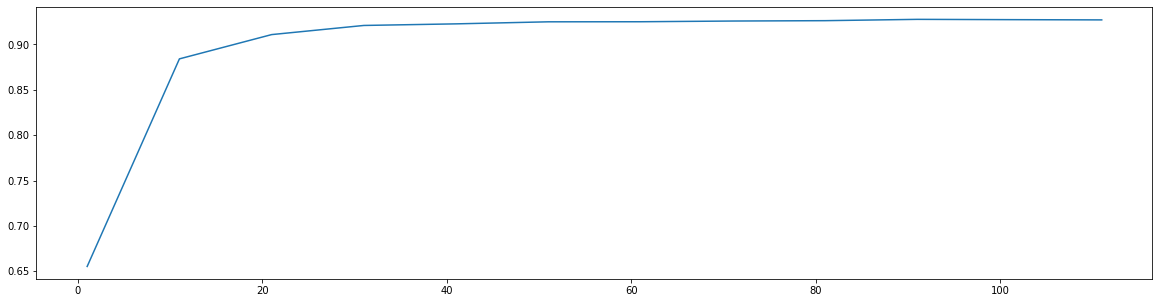

In [16]:
"术中低氧——术前变量"
# 用嵌套交叉验证的方法
# 以10为步长，粗略搜索

rf_score = []
for i in range(0,120,10):
    RF_CV = RandomForestClassifier(n_estimators=i+1, n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_a})
    score = cross_val_score(RF_CV,x_train_1_standard,y_train_1,cv=10, scoring='roc_auc').mean()
    rf_score.append(score)

print("最佳AUROC为：%.4f" % max(rf_score))
print("最佳n_estimators的粗略值：", rf_score.index(max(rf_score))*10)
plt.figure(figsize=[20,5])
plt.plot(range(1,121,10),rf_score)
plt.show()

最佳AUROC为：0.9327
最佳n_estimators的粗略值： 100


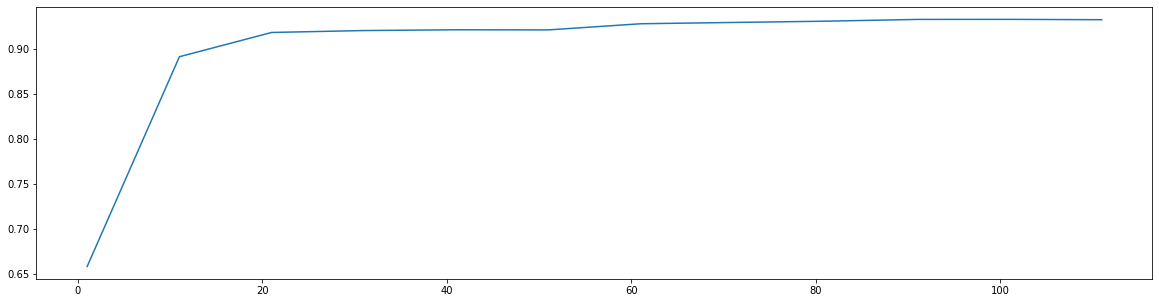

In [20]:
"术中低氧——术前+术中变量"
# 用嵌套交叉验证的方法
# 以10为步长，粗略搜索

rf_score = []
for i in range(0,120,10):
    RF_CV = RandomForestClassifier(n_estimators=i+1, n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_a})
    score = cross_val_score(RF_CV,x_train_2_standard,y_train_2,cv=10, scoring='roc_auc').mean()
    rf_score.append(score)

print("最佳AUROC为：%.4f" % max(rf_score))
print("最佳n_estimators的粗略值：", rf_score.index(max(rf_score))*10)
plt.figure(figsize=[20,5])
plt.plot(range(1,121,10),rf_score)
plt.show()

最佳AUROC为：0.9234
最佳n_estimators的粗略值： 80


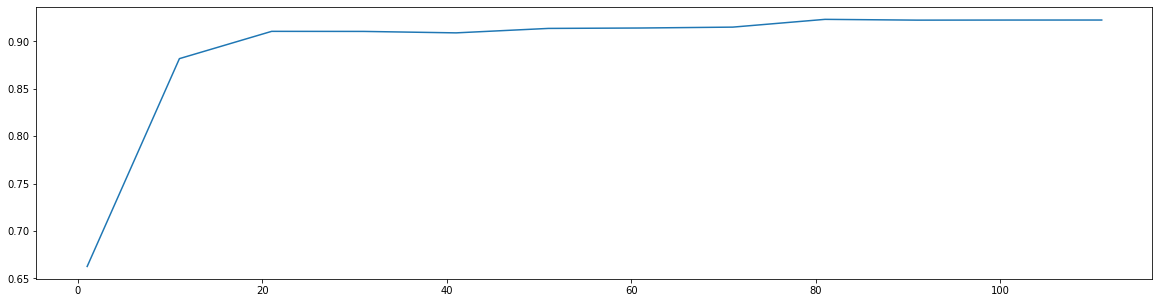

In [21]:
"诱导低氧——术前变量"
# 用嵌套交叉验证的方法
# 以10为步长，粗略搜索

rf_score = []
for i in range(0,120,10):
    RF_CV = RandomForestClassifier(n_estimators=i+1, n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_b})
    score = cross_val_score(RF_CV,x_train_3_standard,y_train_3,cv=10, scoring='roc_auc').mean()
    rf_score.append(score)

print("最佳AUROC为：%.4f" % max(rf_score))
print("最佳n_estimators的粗略值：", rf_score.index(max(rf_score))*10)
plt.figure(figsize=[20,5])
plt.plot(range(1,121,10),rf_score)
plt.show()

最佳AUROC为：0.9264
最佳n_estimators的粗略值： 60


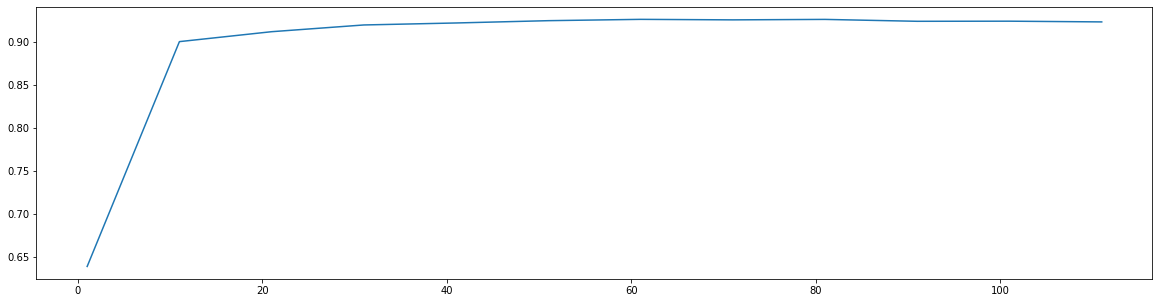

In [22]:
"诱导低氧——术前+诱导变量"
# 用嵌套交叉验证的方法
# 以10为步长，粗略搜索

rf_score = []
for i in range(0,120,10):
    RF_CV = RandomForestClassifier(n_estimators=i+1, n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_b})
    score = cross_val_score(RF_CV,x_train_4_standard,y_train_4,cv=10, scoring='roc_auc').mean()
    rf_score.append(score)

print("最佳AUROC为：%.4f" % max(rf_score))
print("最佳n_estimators的粗略值：", rf_score.index(max(rf_score))*10)
plt.figure(figsize=[20,5])
plt.plot(range(1,121,10),rf_score)
plt.show()

#### 1-2. 首先对 n_estimators 参数进行调整（精调）

最佳AUROC为：0.9279
最佳n_estimators值： 93


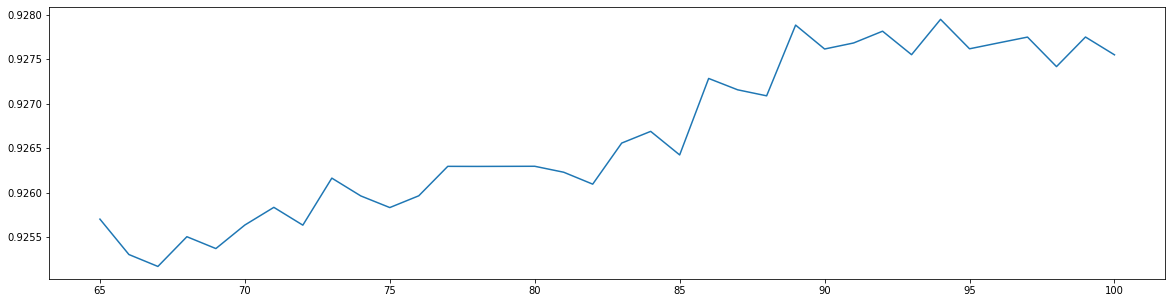

In [17]:
"""术中低氧——术前变量"""
# 缩小范围
rf_score = []
for i in range(64,100):
    RF_CV = RandomForestClassifier(n_estimators=i+1, n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_a})
    score = cross_val_score(RF_CV,x_train_1_standard,y_train_1,cv=10, scoring='roc_auc').mean()
    rf_score.append(score)

print("最佳AUROC为：%.4f" % max(rf_score))
print("最佳n_estimators值：",([*range(64,100)][rf_score.index(max(rf_score))]))
plt.figure(figsize=[20,5])
plt.plot(range(65,101),rf_score)
plt.show()

最佳AUROC为：0.9332
最佳n_estimators值： 92


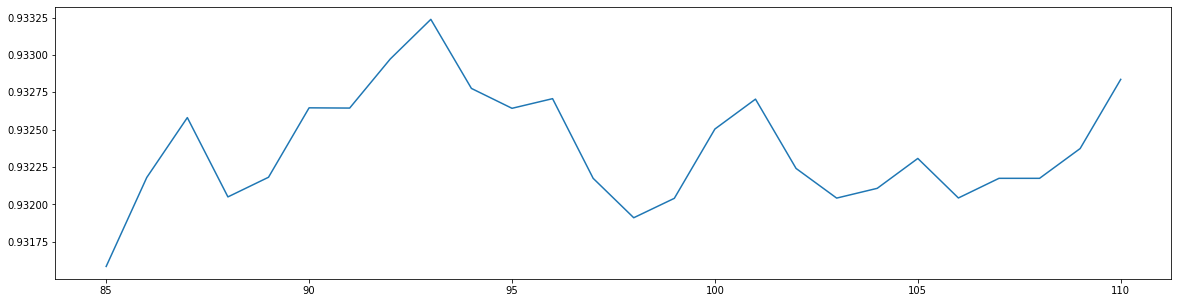

In [25]:
"""术中低氧——术前+术中变量"""
# 缩小范围
rf_score = []
for i in range(84,110):
    RF_CV = RandomForestClassifier(n_estimators=i+1, n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_a})
    score = cross_val_score(RF_CV,x_train_2_standard,y_train_2,cv=10, scoring='roc_auc').mean()
    rf_score.append(score)

print("最佳AUROC为：%.4f" % max(rf_score))
print("最佳n_estimators值：",([*range(84,110)][rf_score.index(max(rf_score))]))
plt.figure(figsize=[20,5])
plt.plot(range(85,111),rf_score)
plt.show()

最佳AUROC为：0.9237
最佳n_estimators值： 95


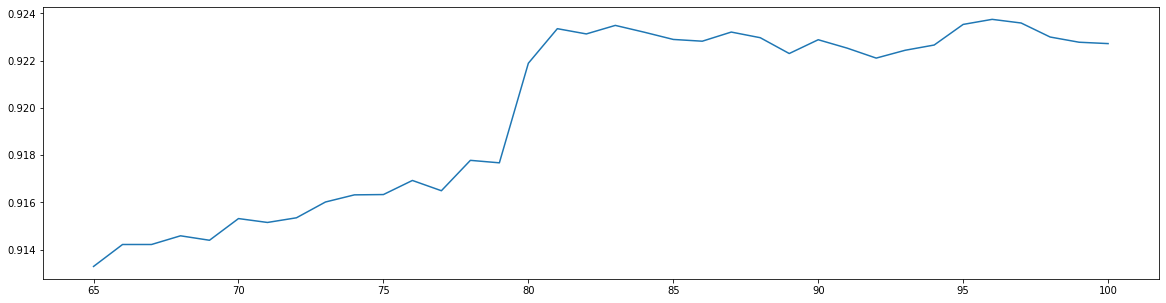

In [26]:
"""术中低氧——术前+术中变量"""
# 缩小范围
rf_score = []
for i in range(64,100):
    RF_CV = RandomForestClassifier(n_estimators=i+1, n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_b})
    score = cross_val_score(RF_CV,x_train_3_standard,y_train_3,cv=10, scoring='roc_auc').mean()
    rf_score.append(score)

print("最佳AUROC为：%.4f" % max(rf_score))
print("最佳n_estimators值：",([*range(64,100)][rf_score.index(max(rf_score))]))
plt.figure(figsize=[20,5])
plt.plot(range(65,101),rf_score)
plt.show()

最佳AUROC为：0.9269
最佳n_estimators值： 61


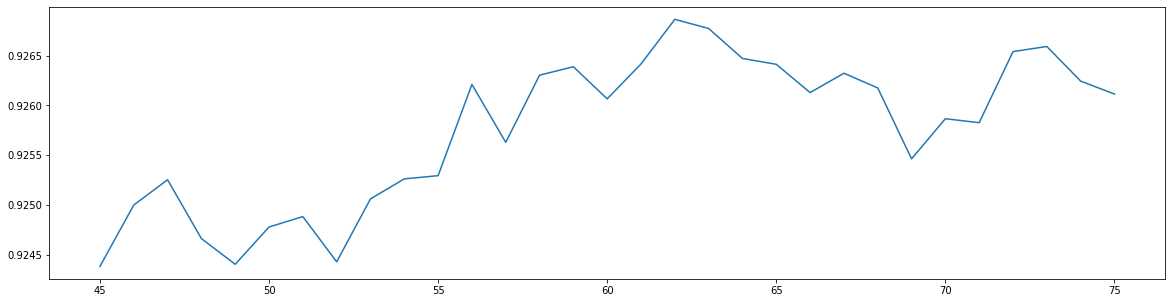

In [28]:
"""术中低氧——术前+术中变量"""
# 缩小范围
rf_score = []
for i in range(44,75):
    RF_CV = RandomForestClassifier(n_estimators=i+1, n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_b})
    score = cross_val_score(RF_CV,x_train_4_standard,y_train_4,cv=10, scoring='roc_auc').mean()
    rf_score.append(score)

print("最佳AUROC为：%.4f" % max(rf_score))
print("最佳n_estimators值：",([*range(44,75)][rf_score.index(max(rf_score))]))
plt.figure(figsize=[20,5])
plt.plot(range(45,76),rf_score)
plt.show()

#### 2. 调整max_depth

In [18]:
"""参数列表"""

# 术中低氧——术前变量
parameters_1 = {'n_estimators':93, 
                'max_depth':None, 
                'min_samples_leaf':1, 
                'min_samples_split':2, 
                'max_features':"auto", 
                'class_weight':{0:1, 1:weight_a}, 
                'random_state':42}

# 术中低氧——术前+术中变量
parameters_2 = {'n_estimators':92, 
                'max_depth':None, 
                'min_samples_leaf':1, 
                'min_samples_split':2, 
                'max_features':"auto", 
                'class_weight':{0:1, 1:weight_a}, 
                'random_state':42}

# 诱导低氧——术前变量
parameters_3 = {'n_estimators':95, 
                'max_depth':None, 
                'min_samples_leaf':1, 
                'min_samples_split':2, 
                'max_features':"auto", 
                'class_weight':{0:1, 1:weight_b}, 
                'random_state':42}

# 诱导低氧——术前+诱导变量
parameters_4 = {'n_estimators':61, 
                'max_depth':None, 
                'min_samples_leaf':1, 
                'min_samples_split':2, 
                'max_features':"auto", 
                'class_weight':{0:1, 1:weight_b}, 
                'random_state':42}

In [19]:
"""术中低氧——术前变量"""
# 调整max_depth，采用网格搜索
List_1 = {'max_depth':np.arange(1, 20, 1)}

RF_S = RandomForestClassifier(**parameters_1)


Grid_Search_1 = GridSearchCV(RF_S, param_grid = List_1, scoring='roc_auc', cv=10)

Grid_Search_1.fit(x_train_1_standard, y_train_1)

joblib.dump(Grid_Search_1, "[2]Model_Save/[2]Model/[1]Intraoperative/[1]/Grid Search/Grid_Search_RF_1.pkl")

print('模型最ROC_AUC:{:.4f}'.format(Grid_Search_1.best_score_))
print('最优“max_depth”值为:{}'.format(Grid_Search_1.best_params_))

模型最ROC_AUC:0.9314
最优“max_depth”值为:{'max_depth': 13}


最佳AUROC为：0.9314
最佳max_depth值： 13
最佳Accuracy为：0.9159
最佳max_depth值： 18
最佳F1 Score为：0.5632
最佳max_depth值： 6


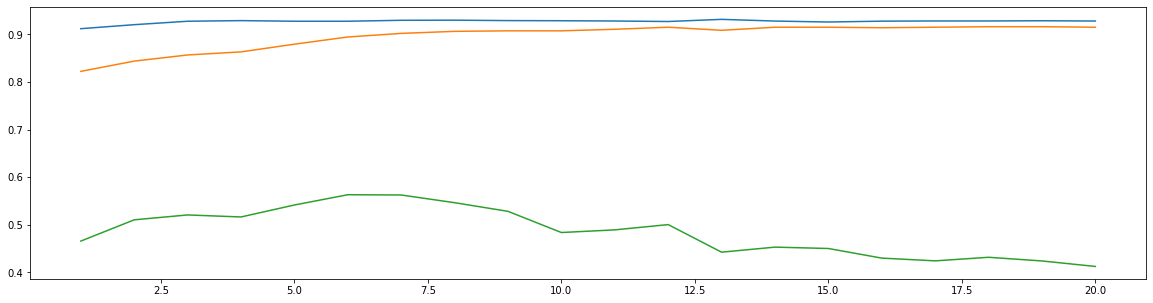

In [20]:
# ROC/Accuracy/F1Score
rf_roc_score = []
for i in range(0,20):
    RF_CV = RandomForestClassifier(n_estimators=93, max_depth=i+1, n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_a})
    score = cross_val_score(RF_CV,x_train_1_standard,y_train_1,cv=10, scoring='roc_auc').mean()
    rf_roc_score.append(score)

print("最佳AUROC为：%.4f" % max(rf_roc_score))
print("最佳max_depth值：",([*range(1,21)][rf_roc_score.index(max(rf_roc_score))]))
plt.figure(figsize=[20,5])
plt.plot(range(1,21),rf_roc_score, label='ROC')

# Accuuracy
rf_acc_score = []
for i in range(0,20):
    RF_CV = RandomForestClassifier(n_estimators=93, max_depth=i+1, n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_a})
    score = cross_val_score(RF_CV,x_train_1_standard,y_train_1,cv=10, scoring='accuracy').mean()
    rf_acc_score.append(score)

print("最佳Accuracy为：%.4f" % max(rf_acc_score))
print("最佳max_depth值：",([*range(1,21)][rf_acc_score.index(max(rf_acc_score))]))
plt.plot(range(1,21),rf_acc_score, label='Accuracy')

# F1
rf_f1_score = []
for i in range(0,20):
    RF_CV = RandomForestClassifier(n_estimators=93, max_depth=i+1, n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_a})
    score = cross_val_score(RF_CV,x_train_1_standard,y_train_1,cv=10, scoring='f1').mean()
    rf_f1_score.append(score)

print("最佳F1 Score为：%.4f" % max(rf_f1_score))
print("最佳max_depth值：",([*range(1,21)][rf_f1_score.index(max(rf_f1_score))]))
plt.plot(range(1,21),rf_f1_score, label='F1 Score')

plt.show()

In [32]:
"""术中低氧——术前+术中变量"""
# 调整max_depth，采用网格搜索
List_1 = {'max_depth':np.arange(1, 20, 1)}

RF_S = RandomForestClassifier(**parameters_2)


Grid_Search_1 = GridSearchCV(RF_S, param_grid = List_1, scoring='roc_auc', cv=10)

Grid_Search_1.fit(x_train_2_standard, y_train_2)

joblib.dump(Grid_Search_1, "[2]Model_Save/[2]Model/[1]Intraoperative/[2]/Grid Search/Grid_Search_RF_1.pkl")

print('模型最ROC_AUC:{:.4f}'.format(Grid_Search_1.best_score_))
print('最优“max_depth”值为:{}'.format(Grid_Search_1.best_params_))

模型最ROC_AUC:0.9343
最优“max_depth”值为:{'max_depth': 12}


最佳AUROC为：0.9343
最佳max_depth值： 12
最佳Accuracy为：0.9138
最佳max_depth值： 7
最佳F1 Score为：0.6032
最佳max_depth值： 7


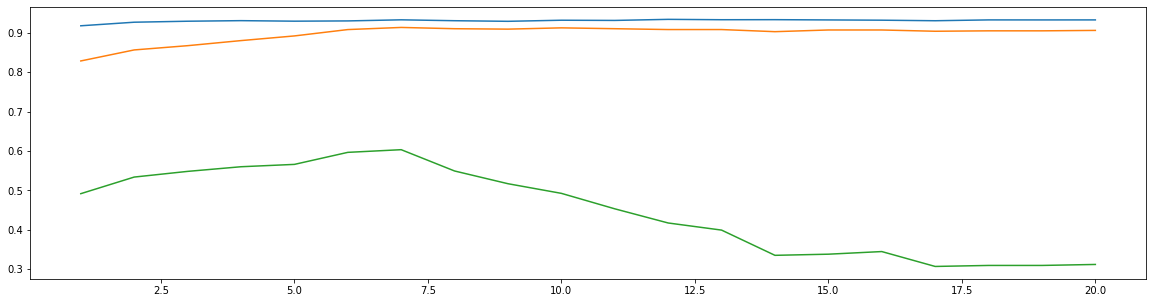

In [33]:
# ROC/Accuracy/F1Score
rf_roc_score = []
for i in range(0,20):
    RF_CV = RandomForestClassifier(n_estimators=92, max_depth=i+1, n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_a})
    score = cross_val_score(RF_CV,x_train_2_standard,y_train_2,cv=10, scoring='roc_auc').mean()
    rf_roc_score.append(score)

print("最佳AUROC为：%.4f" % max(rf_roc_score))
print("最佳max_depth值：",([*range(1,21)][rf_roc_score.index(max(rf_roc_score))]))
plt.figure(figsize=[20,5])
plt.plot(range(1,21),rf_roc_score, label='ROC')

# Accuuracy
rf_acc_score = []
for i in range(0,20):
    RF_CV = RandomForestClassifier(n_estimators=92, max_depth=i+1, n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_a})
    score = cross_val_score(RF_CV,x_train_2_standard,y_train_2,cv=10, scoring='accuracy').mean()
    rf_acc_score.append(score)

print("最佳Accuracy为：%.4f" % max(rf_acc_score))
print("最佳max_depth值：",([*range(1,21)][rf_acc_score.index(max(rf_acc_score))]))
plt.plot(range(1,21),rf_acc_score, label='Accuracy')

# F1
rf_f1_score = []
for i in range(0,20):
    RF_CV = RandomForestClassifier(n_estimators=92, max_depth=i+1, n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_a})
    score = cross_val_score(RF_CV,x_train_2_standard,y_train_2,cv=10, scoring='f1').mean()
    rf_f1_score.append(score)

print("最佳F1 Score为：%.4f" % max(rf_f1_score))
print("最佳max_depth值：",([*range(1,21)][rf_f1_score.index(max(rf_f1_score))]))
plt.plot(range(1,21),rf_f1_score, label='F1 Score')

plt.show()

In [34]:
"""诱导低氧——术前变量"""
# 调整max_depth，采用网格搜索
List_1 = {'max_depth':np.arange(1, 20, 1)}

RF_S = RandomForestClassifier(**parameters_3)


Grid_Search_1 = GridSearchCV(RF_S, param_grid = List_1, scoring='roc_auc', cv=10)

Grid_Search_1.fit(x_train_3_standard, y_train_3)

joblib.dump(Grid_Search_1, "[2]Model_Save/[2]Model/[2]Induction/[1]/Grid Search/Grid_Search_RF_1.pkl")

print('模型最ROC_AUC:{:.4f}'.format(Grid_Search_1.best_score_))
print('最优“max_depth”值为:{}'.format(Grid_Search_1.best_params_))

模型最ROC_AUC:0.9252
最优“max_depth”值为:{'max_depth': 8}


最佳AUROC为：0.9252
最佳max_depth值： 8
最佳Accuracy为：0.9202
最佳max_depth值： 15
最佳F1 Score为：0.5272
最佳max_depth值： 8


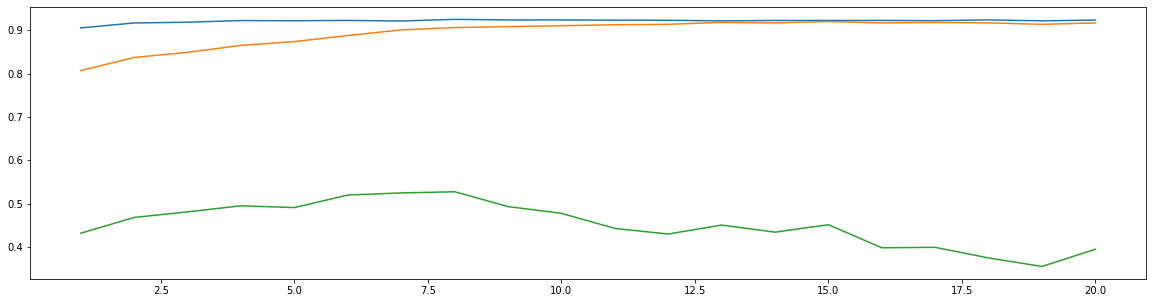

In [35]:
# ROC/Accuracy/F1Score
rf_roc_score = []
for i in range(0,20):
    RF_CV = RandomForestClassifier(n_estimators=95, max_depth=i+1, n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_b})
    score = cross_val_score(RF_CV,x_train_3_standard,y_train_3,cv=10, scoring='roc_auc').mean()
    rf_roc_score.append(score)

print("最佳AUROC为：%.4f" % max(rf_roc_score))
print("最佳max_depth值：",([*range(1,21)][rf_roc_score.index(max(rf_roc_score))]))
plt.figure(figsize=[20,5])
plt.plot(range(1,21),rf_roc_score, label='ROC')

# Accuuracy
rf_acc_score = []
for i in range(0,20):
    RF_CV = RandomForestClassifier(n_estimators=95, max_depth=i+1, n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_b})
    score = cross_val_score(RF_CV,x_train_3_standard,y_train_3,cv=10, scoring='accuracy').mean()
    rf_acc_score.append(score)

print("最佳Accuracy为：%.4f" % max(rf_acc_score))
print("最佳max_depth值：",([*range(1,21)][rf_acc_score.index(max(rf_acc_score))]))
plt.plot(range(1,21),rf_acc_score, label='Accuracy')

# F1
rf_f1_score = []
for i in range(0,20):
    RF_CV = RandomForestClassifier(n_estimators=95, max_depth=i+1, n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_b})
    score = cross_val_score(RF_CV,x_train_3_standard,y_train_3,cv=10, scoring='f1').mean()
    rf_f1_score.append(score)

print("最佳F1 Score为：%.4f" % max(rf_f1_score))
print("最佳max_depth值：",([*range(1,21)][rf_f1_score.index(max(rf_f1_score))]))
plt.plot(range(1,21),rf_f1_score, label='F1 Score')

plt.show()

In [36]:
"""诱导低氧——术前变量"""
# 调整max_depth，采用网格搜索
List_1 = {'max_depth':np.arange(1, 20, 1)}

RF_S = RandomForestClassifier(**parameters_4)


Grid_Search_1 = GridSearchCV(RF_S, param_grid = List_1, scoring='roc_auc', cv=10)

Grid_Search_1.fit(x_train_4_standard, y_train_4)

joblib.dump(Grid_Search_1, "[2]Model_Save/[2]Model/[2]Induction/[2]/Grid Search/Grid_Search_RF_1.pkl")

print('模型最ROC_AUC:{:.4f}'.format(Grid_Search_1.best_score_))
print('最优“max_depth”值为:{}'.format(Grid_Search_1.best_params_))

模型最ROC_AUC:0.9326
最优“max_depth”值为:{'max_depth': 7}


最佳AUROC为：0.9326
最佳max_depth值： 7
最佳Accuracy为：0.9213
最佳max_depth值： 12
最佳F1 Score为：0.5871
最佳max_depth值： 7


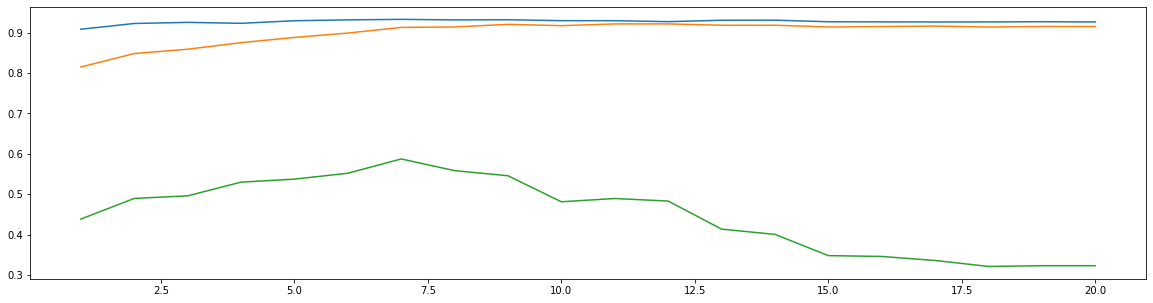

In [37]:
# ROC/Accuracy/F1Score
rf_roc_score = []
for i in range(0,20):
    RF_CV = RandomForestClassifier(n_estimators=61, max_depth=i+1, n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_b})
    score = cross_val_score(RF_CV,x_train_4_standard,y_train_4,cv=10, scoring='roc_auc').mean()
    rf_roc_score.append(score)

print("最佳AUROC为：%.4f" % max(rf_roc_score))
print("最佳max_depth值：",([*range(1,21)][rf_roc_score.index(max(rf_roc_score))]))
plt.figure(figsize=[20,5])
plt.plot(range(1,21),rf_roc_score, label='ROC')

# Accuuracy
rf_acc_score = []
for i in range(0,20):
    RF_CV = RandomForestClassifier(n_estimators=61, max_depth=i+1, n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_b})
    score = cross_val_score(RF_CV,x_train_4_standard,y_train_4,cv=10, scoring='accuracy').mean()
    rf_acc_score.append(score)

print("最佳Accuracy为：%.4f" % max(rf_acc_score))
print("最佳max_depth值：",([*range(1,21)][rf_acc_score.index(max(rf_acc_score))]))
plt.plot(range(1,21),rf_acc_score, label='Accuracy')

# F1
rf_f1_score = []
for i in range(0,20):
    RF_CV = RandomForestClassifier(n_estimators=61, max_depth=i+1, n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_b})
    score = cross_val_score(RF_CV,x_train_4_standard,y_train_4,cv=10, scoring='f1').mean()
    rf_f1_score.append(score)

print("最佳F1 Score为：%.4f" % max(rf_f1_score))
print("最佳max_depth值：",([*range(1,21)][rf_f1_score.index(max(rf_f1_score))]))
plt.plot(range(1,21),rf_f1_score, label='F1 Score')

plt.show()

#### 3. 调整 min_samples_leaf

In [23]:
# 参数表更新

# 术中低氧——术前变量
parameters_1 = {'n_estimators':93, 
                'max_depth':6, 
                'min_samples_leaf':1, 
                'min_samples_split':2, 
                'max_features':"auto", 
                'class_weight':{0:1, 1:weight_a}, 
                'random_state':42}

# 术中低氧——术前+术中变量
parameters_2 = {'n_estimators':92, 
                'max_depth':7, 
                'min_samples_leaf':1, 
                'min_samples_split':2, 
                'max_features':"auto", 
                'class_weight':{0:1, 1:weight_a}, 
                'random_state':42}

# 诱导低氧——术前变量
parameters_3 = {'n_estimators':95, 
                'max_depth':8, 
                'min_samples_leaf':1, 
                'min_samples_split':2, 
                'max_features':"auto", 
                'class_weight':{0:1, 1:weight_b}, 
                'random_state':42}

# 诱导低氧——术前+诱导变量
parameters_4 = {'n_estimators':61, 
                'max_depth':7, 
                'min_samples_leaf':1, 
                'min_samples_split':2, 
                'max_features':"auto", 
                'class_weight':{0:1, 1:weight_b}, 
                'random_state':42}

In [24]:
"""术中低氧——术前变量"""

List_2 = {'min_samples_leaf':np.arange(1, 1+30, 1)}

RF_S = RandomForestClassifier(**parameters_1)

Grid_Search_2 = GridSearchCV(RF_S, param_grid = List_2, scoring='roc_auc', cv=10)

Grid_Search_2.fit(x_train_1_standard,y_train_1)

joblib.dump(Grid_Search_2, "[2]Model_Save/[2]Model/[1]Intraoperative/[1]/Grid Search/Grid_Search_RF_2.pkl")

print('模型最ROC_AUC:{:.3f}'.format(Grid_Search_2.best_score_))
print('最优“min_samples_leaf”值为:{}'.format(Grid_Search_2.best_params_))

模型最ROC_AUC:0.932
最优“min_samples_leaf”值为:{'min_samples_leaf': 7}


最佳AUROC为：0.9321
最佳min_samples_leaf值： 7


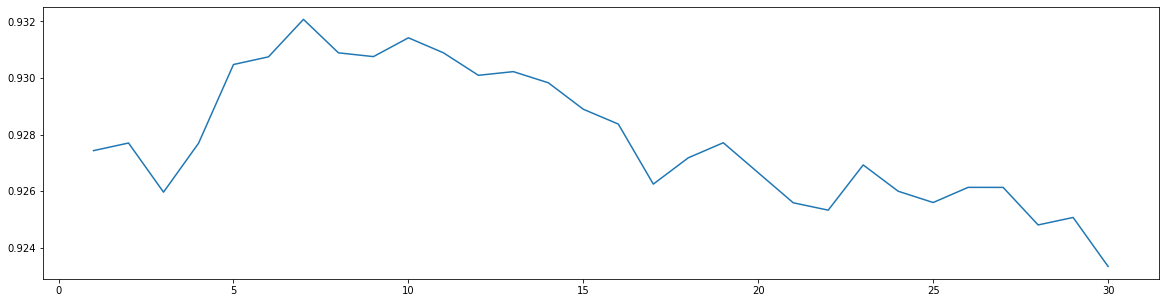

In [22]:
rf_score = []
for i in range(0,30):
    RF_CV = RandomForestClassifier(n_estimators=93, max_depth=6, min_samples_leaf=i+1, 
                                   n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_a})
    score = cross_val_score(RF_CV,x_train_1_standard, y_train_1,cv=10, scoring='roc_auc').mean()
    rf_score.append(score)

print("最佳AUROC为：%.4f" % max(rf_score))
print("最佳min_samples_leaf值：",([*range(1,31)][rf_score.index(max(rf_score))]))
plt.figure(figsize=[20,5])
plt.plot(range(1,31),rf_score)
plt.show()

In [41]:
"""术中低氧——术前+术中变量"""

List_2 = {'min_samples_leaf':np.arange(1, 1+30, 1)}

RF_S = RandomForestClassifier(**parameters_2)

Grid_Search_2 = GridSearchCV(RF_S, param_grid = List_2, scoring='roc_auc', cv=10)

Grid_Search_2.fit(x_train_2_standard,y_train_2)

joblib.dump(Grid_Search_2, "[2]Model_Save/[2]Model/[1]Intraoperative/[2]/Grid Search/Grid_Search_RF_2.pkl")

print('模型最ROC_AUC:{:.3f}'.format(Grid_Search_2.best_score_))
print('最优“min_samples_leaf”值为:{}'.format(Grid_Search_2.best_params_))

模型最ROC_AUC:0.941
最优“min_samples_leaf”值为:{'min_samples_leaf': 8}


最佳AUROC为：0.9410
最佳min_samples_leaf值： 8


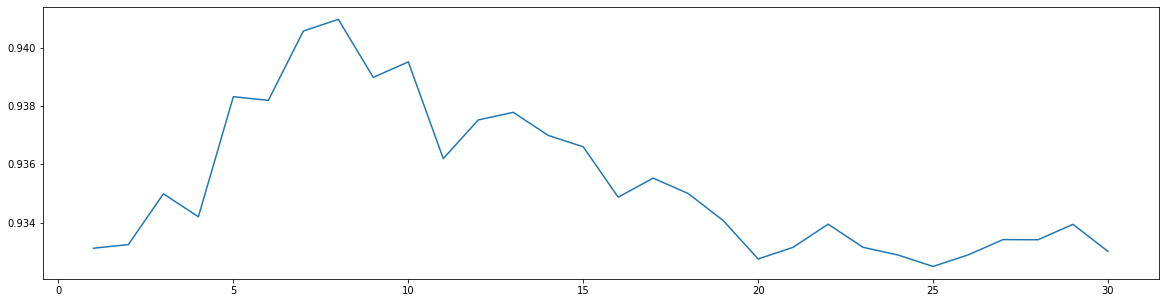

In [42]:
rf_score = []
for i in range(0,30):
    RF_CV = RandomForestClassifier(n_estimators=92, max_depth=7, min_samples_leaf=i+1, 
                                   n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_a})
    score = cross_val_score(RF_CV,x_train_2_standard, y_train_2,cv=10, scoring='roc_auc').mean()
    rf_score.append(score)

print("最佳AUROC为：%.4f" % max(rf_score))
print("最佳min_samples_leaf值：",([*range(1,31)][rf_score.index(max(rf_score))]))
plt.figure(figsize=[20,5])
plt.plot(range(1,31),rf_score)
plt.show()

In [43]:
"""诱导低氧——术前变量"""

List_2 = {'min_samples_leaf':np.arange(1, 1+30, 1)}

RF_S = RandomForestClassifier(**parameters_3)

Grid_Search_2 = GridSearchCV(RF_S, param_grid = List_2, scoring='roc_auc', cv=10)

Grid_Search_2.fit(x_train_3_standard,y_train_3)

joblib.dump(Grid_Search_2, "[2]Model_Save/[2]Model/[2]Induction/[1]/Grid Search/Grid_Search_RF_2.pkl")

print('模型最ROC_AUC:{:.3f}'.format(Grid_Search_2.best_score_))
print('最优“min_samples_leaf”值为:{}'.format(Grid_Search_2.best_params_))

模型最ROC_AUC:0.927
最优“min_samples_leaf”值为:{'min_samples_leaf': 9}


最佳AUROC为：0.9265
最佳min_samples_leaf值： 9


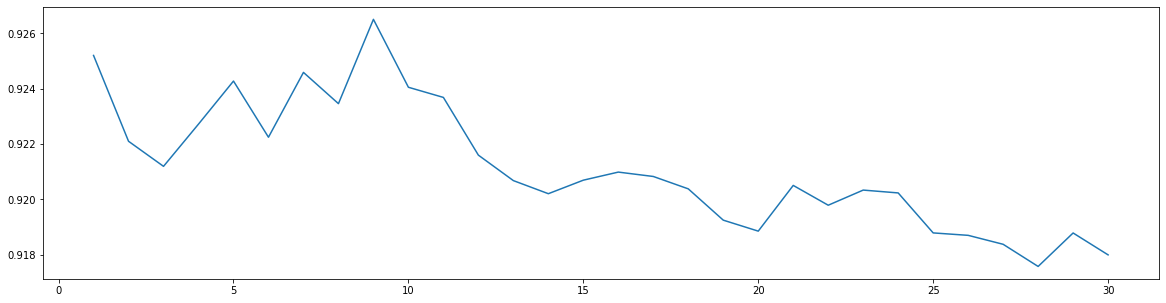

In [44]:
rf_score = []
for i in range(0,30):
    RF_CV = RandomForestClassifier(n_estimators=95, max_depth=8, min_samples_leaf=i+1, 
                                   n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_b})
    score = cross_val_score(RF_CV,x_train_3_standard, y_train_3,cv=10, scoring='roc_auc').mean()
    rf_score.append(score)

print("最佳AUROC为：%.4f" % max(rf_score))
print("最佳min_samples_leaf值：",([*range(1,31)][rf_score.index(max(rf_score))]))
plt.figure(figsize=[20,5])
plt.plot(range(1,31),rf_score)
plt.show()

In [46]:
"""诱导低氧——术前+诱导变量"""

List_2 = {'min_samples_leaf':np.arange(1, 1+30, 1)}

RF_S = RandomForestClassifier(**parameters_4)

Grid_Search_2 = GridSearchCV(RF_S, param_grid = List_2, scoring='roc_auc', cv=10)

Grid_Search_2.fit(x_train_4_standard,y_train_4)

joblib.dump(Grid_Search_2, "[2]Model_Save/[2]Model/[2]Induction/[2]/Grid Search/Grid_Search_RF_2.pkl")

print('模型最ROC_AUC:{:.3f}'.format(Grid_Search_2.best_score_))
print('最优“min_samples_leaf”值为:{}'.format(Grid_Search_2.best_params_))

模型最ROC_AUC:0.934
最优“min_samples_leaf”值为:{'min_samples_leaf': 7}


最佳AUROC为：0.9340
最佳min_samples_leaf值： 7


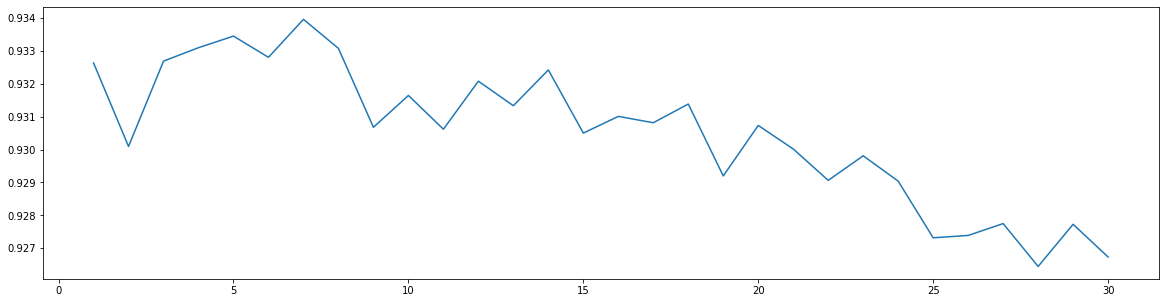

In [47]:
rf_score = []
for i in range(0,30):
    RF_CV = RandomForestClassifier(n_estimators=61, max_depth=7, min_samples_leaf=i+1, 
                                   n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_b})
    score = cross_val_score(RF_CV,x_train_4_standard, y_train_4,cv=10, scoring='roc_auc').mean()
    rf_score.append(score)

print("最佳AUROC为：%.4f" % max(rf_score))
print("最佳min_samples_leaf值：",([*range(1,31)][rf_score.index(max(rf_score))]))
plt.figure(figsize=[20,5])
plt.plot(range(1,31),rf_score)
plt.show()

#### 4. 调整 min_samples_split

In [25]:
"""参数表更新"""

# 术中低氧——术前变量
parameters_1 = {'n_estimators':93, 
                'max_depth':6, 
                'min_samples_leaf':7, 
                'min_samples_split':2, 
                'max_features':"auto", 
                'class_weight':{0:1, 1:weight_a}, 
                'random_state':42}

# 术中低氧——术前+术中变量
parameters_2 = {'n_estimators':92, 
                'max_depth':7, 
                'min_samples_leaf':8, 
                'min_samples_split':2, 
                'max_features':"auto", 
                'class_weight':{0:1, 1:weight_a}, 
                'random_state':42}

# 诱导低氧——术前变量
parameters_3 = {'n_estimators':95, 
                'max_depth':8, 
                'min_samples_leaf':9, 
                'min_samples_split':2, 
                'max_features':"auto", 
                'class_weight':{0:1, 1:weight_b}, 
                'random_state':42}

# 诱导低氧——术前+诱导变量
parameters_4 = {'n_estimators':61, 
                'max_depth':7, 
                'min_samples_leaf':7, 
                'min_samples_split':2, 
                'max_features':"auto", 
                'class_weight':{0:1, 1:weight_b}, 
                'random_state':42}

In [26]:
"""术中低氧——术前变量"""

List_3 = {'min_samples_split':np.arange(2, 1+30, 1)}

RF_S = RandomForestClassifier(**parameters_1)

Grid_Search_3 = GridSearchCV(RF_S, param_grid = List_3, scoring='roc_auc', cv=10)

Grid_Search_3.fit(x_train_1_standard, y_train_1)

joblib.dump(Grid_Search_3, "[2]Model_Save/[2]Model/[1]Intraoperative/[1]/Grid Search/Grid_Search_RF_3.pkl")

print('模型最ROC_AUC:{:.3f}'.format(Grid_Search_3.best_score_))
print('最优“min_samples_split”值为:{}'.format(Grid_Search_3.best_params_))

模型最ROC_AUC:0.934
最优“min_samples_split”值为:{'min_samples_split': 15}


最佳AUROC为：0.9335
最佳min_samples_split值： 15


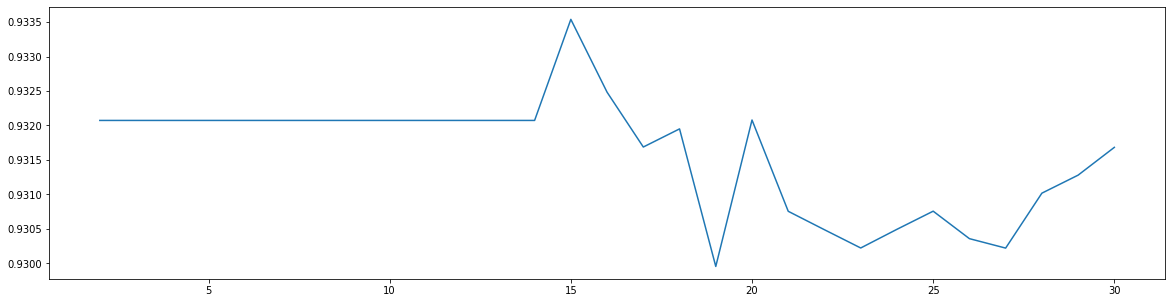

In [27]:
rf_score = []
for i in range(1,30):
    RF_CV = RandomForestClassifier(n_estimators=93, max_depth=6, min_samples_leaf=7, min_samples_split=i+1, 
                                   n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_a})
    score = cross_val_score(RF_CV,x_train_1_standard, y_train_1,cv=10, scoring='roc_auc').mean()
    rf_score.append(score)

print("最佳AUROC为：%.4f" % max(rf_score))
print("最佳min_samples_split值：",([*range(2,31)][rf_score.index(max(rf_score))]))
plt.figure(figsize=[20,5])
plt.plot(range(2,31),rf_score)
plt.show()

In [52]:
"""术中低氧——术前+术中变量"""

List_3 = {'min_samples_split':np.arange(2, 1+30, 1)}

RF_S = RandomForestClassifier(**parameters_2)

Grid_Search_3 = GridSearchCV(RF_S, param_grid = List_3, scoring='roc_auc', cv=10)

Grid_Search_3.fit(x_train_2_standard, y_train_2)

joblib.dump(Grid_Search_3, "[2]Model_Save/[2]Model/[1]Intraoperative/[2]/Grid Search/Grid_Search_RF_3.pkl")

print('模型最ROC_AUC:{:.3f}'.format(Grid_Search_3.best_score_))
print('最优“min_samples_split”值为:{}'.format(Grid_Search_3.best_params_))

模型最ROC_AUC:0.941
最优“min_samples_split”值为:{'min_samples_split': 2}


最佳AUROC为：0.9410
最佳min_samples_split值： 2


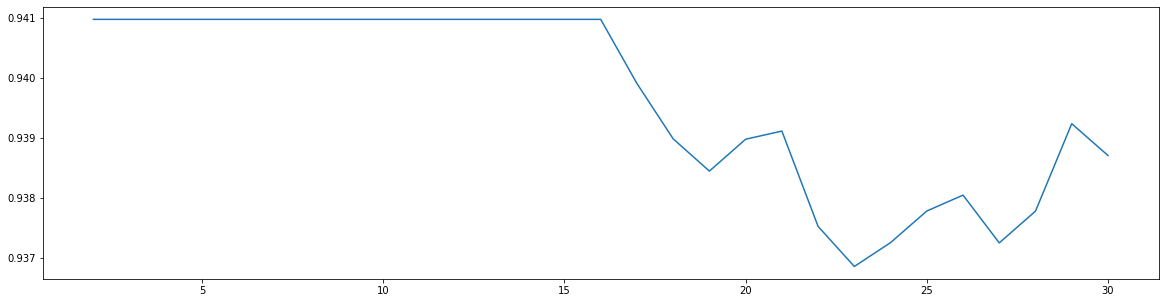

In [53]:
rf_score = []
for i in range(1,30):
    RF_CV = RandomForestClassifier(n_estimators=92, max_depth=7, min_samples_leaf=8, min_samples_split=i+1, 
                                   n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_a})
    score = cross_val_score(RF_CV,x_train_2_standard, y_train_2,cv=10, scoring='roc_auc').mean()
    rf_score.append(score)

print("最佳AUROC为：%.4f" % max(rf_score))
print("最佳min_samples_split值：",([*range(2,31)][rf_score.index(max(rf_score))]))
plt.figure(figsize=[20,5])
plt.plot(range(2,31),rf_score)
plt.show()

In [54]:
"""术中低氧——术前+术中变量"""

List_3 = {'min_samples_split':np.arange(2, 1+30, 1)}

RF_S = RandomForestClassifier(**parameters_3)

Grid_Search_3 = GridSearchCV(RF_S, param_grid = List_3, scoring='roc_auc', cv=10)

Grid_Search_3.fit(x_train_3_standard, y_train_3)

joblib.dump(Grid_Search_3, "[2]Model_Save/[2]Model/[2]Induction/[1]/Grid Search/Grid_Search_RF_3.pkl")

print('模型最ROC_AUC:{:.3f}'.format(Grid_Search_3.best_score_))
print('最优“min_samples_split”值为:{}'.format(Grid_Search_3.best_params_))

模型最ROC_AUC:0.927
最优“min_samples_split”值为:{'min_samples_split': 19}


最佳AUROC为：0.9267
最佳min_samples_split值： 19


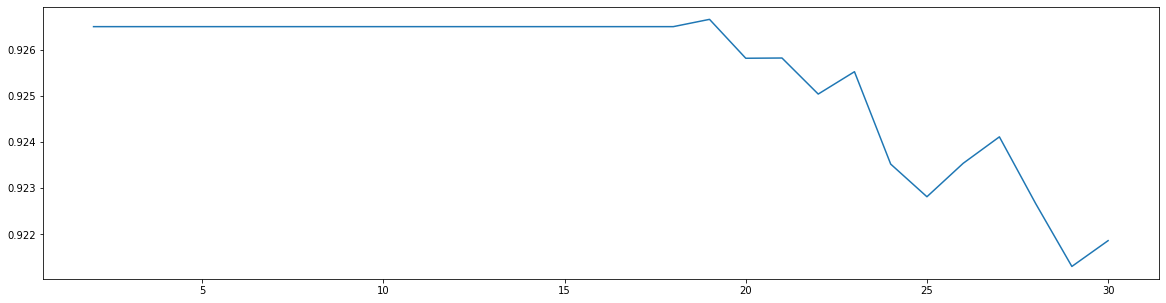

In [59]:
rf_score = []
for i in range(1,30):
    RF_CV = RandomForestClassifier(n_estimators=95, max_depth=8, min_samples_leaf=9, min_samples_split=i+1, 
                                   n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_b})
    score = cross_val_score(RF_CV,x_train_3_standard, y_train_3, cv=10, scoring='roc_auc').mean()
    rf_score.append(score)

print("最佳AUROC为：%.4f" % max(rf_score))
print("最佳min_samples_split值：",([*range(2,31)][rf_score.index(max(rf_score))]))
plt.figure(figsize=[20,5])
plt.plot(range(2,31),rf_score)
plt.show()

In [57]:
"""术中低氧——术前+术中变量"""

List_3 = {'min_samples_split':np.arange(2, 1+30, 1)}

RF_S = RandomForestClassifier(**parameters_4)

Grid_Search_3 = GridSearchCV(RF_S, param_grid = List_3, scoring='roc_auc', cv=10)

Grid_Search_3.fit(x_train_4_standard, y_train_4)

joblib.dump(Grid_Search_3, "[2]Model_Save/[2]Model/[2]Induction/[2]/Grid Search/Grid_Search_RF_3.pkl")

print('模型最ROC_AUC:{:.3f}'.format(Grid_Search_3.best_score_))
print('最优“min_samples_split”值为:{}'.format(Grid_Search_3.best_params_))

模型最ROC_AUC:0.935
最优“min_samples_split”值为:{'min_samples_split': 16}


最佳AUROC为：0.9355
最佳min_samples_split值： 16


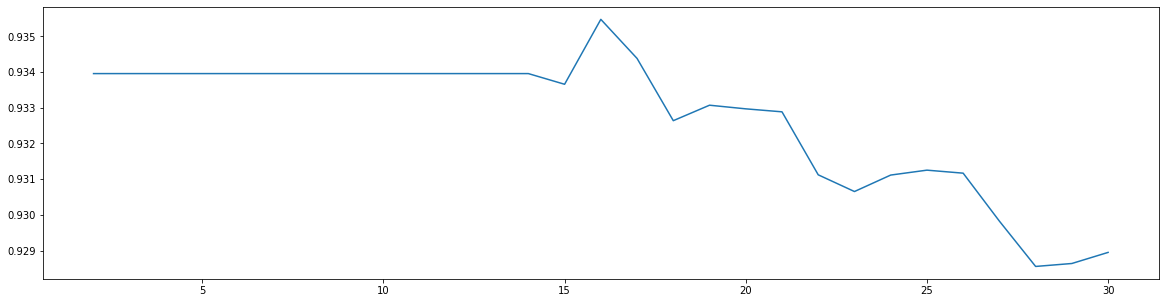

In [61]:
rf_score = []
for i in range(1,30):
    RF_CV = RandomForestClassifier(n_estimators=61, max_depth=7, min_samples_leaf=7, min_samples_split=i+1, 
                                   n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_b})
    score = cross_val_score(RF_CV,x_train_4_standard, y_train_4, cv=10, scoring='roc_auc').mean()
    rf_score.append(score)

print("最佳AUROC为：%.4f" % max(rf_score))
print("最佳min_samples_split值：",([*range(2,31)][rf_score.index(max(rf_score))]))
plt.figure(figsize=[20,5])
plt.plot(range(2,31),rf_score)
plt.show()

#### 5. 调整max_features

In [63]:
"""参数列表更新"""

# 术中低氧——术前变量
parameters_1 = {'n_estimators':83, 
                'max_depth':8, 
                'min_samples_leaf':14, 
                'min_samples_split':2, 
                'max_features':"auto", 
                'class_weight':{0:1, 1:weight_a}, 
                'random_state':42}

# 术中低氧——术前+术中变量
parameters_2 = {'n_estimators':92, 
                'max_depth':7, 
                'min_samples_leaf':8, 
                'min_samples_split':2, 
                'max_features':"auto", 
                'class_weight':{0:1, 1:weight_a}, 
                'random_state':42}

# 诱导低氧——术前变量
parameters_3 = {'n_estimators':95, 
                'max_depth':8, 
                'min_samples_leaf':9, 
                'min_samples_split':19, 
                'max_features':"auto", 
                'class_weight':{0:1, 1:weight_b}, 
                'random_state':42}

# 诱导低氧——术前+诱导变量
parameters_4 = {'n_estimators':61, 
                'max_depth':7, 
                'min_samples_leaf':7, 
                'min_samples_split':16, 
                'max_features':"auto", 
                'class_weight':{0:1, 1:weight_b}, 
                'random_state':42}

In [65]:
"""术中低氧——术前变量"""
# 尝试调整调整'max_features'
List_4 = {'max_features':np.arange(1,30,1)}
RF_S = RandomForestClassifier(**parameters_1)

Grid_Search_4 = GridSearchCV(RF_S, param_grid = List_4, scoring='roc_auc', cv=10)

Grid_Search_4.fit(x_train_1_standard, y_train_1)

joblib.dump(Grid_Search_4, "[2]Model_Save/[2]Model/[1]Intraoperative/[1]/Grid Search/Grid_Search_RF_4.pkl")

print('模型最ROC_AUC:{:.3f}'.format(Grid_Search_4.best_score_))
print('最优“max_features”值为:{}'.format(Grid_Search_4.best_params_))

模型最ROC_AUC:0.934
最优“max_features”值为:{'max_features': 2}


最佳AUROC为：0.9344
最佳max_features值： 2


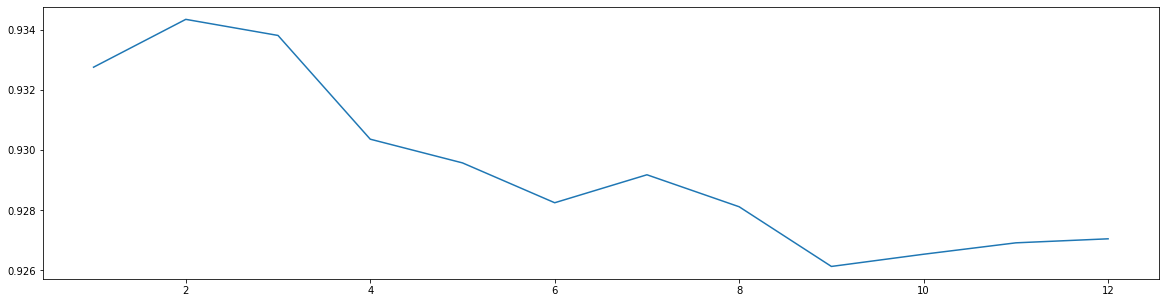

In [67]:
rf_score = []
for i in range(0,30):
    RF_CV = RandomForestClassifier(n_estimators=83, max_depth=8, min_samples_leaf=14,min_samples_split=2, 
                                   max_features=i+1, n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_a})
    score = cross_val_score(RF_CV,x_train_1_standard, y_train_1,cv=10, scoring='roc_auc').mean()
    rf_score.append(score)

print("最佳AUROC为：%.4f" % max(rf_score))
print("最佳max_features值：",([*range(1,31)][rf_score.index(max(rf_score))]))
plt.figure(figsize=[20,5])
plt.plot(range(1,31),rf_score)
plt.show()

In [68]:
"术中低氧——术前+术中变量"
# 尝试调整调整'max_features'
List_4 = {'max_features':np.arange(1,30,1)}
RF_S = RandomForestClassifier(**parameters_2)

Grid_Search_4 = GridSearchCV(RF_S, param_grid = List_4, scoring='roc_auc', cv=10)

Grid_Search_4.fit(x_train_2_standard, y_train_2)

joblib.dump(Grid_Search_4, "[2]Model_Save/[2]Model/[1]Intraoperative/[2]/Grid Search/Grid_Search_RF_4.pkl")

print('模型最ROC_AUC:{:.3f}'.format(Grid_Search_4.best_score_))
print('最优“max_features”值为:{}'.format(Grid_Search_4.best_params_))

模型最ROC_AUC:0.942
最优“max_features”值为:{'max_features': 1}


最佳AUROC为：0.9423
最佳max_features值： 1


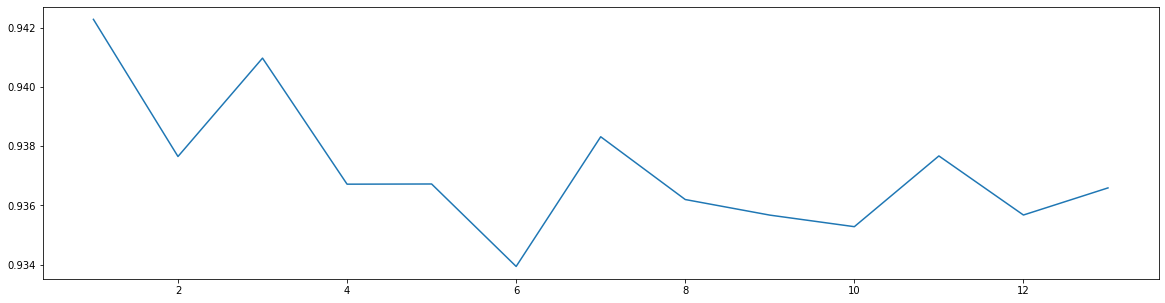

In [69]:
rf_score = []
for i in range(0,30):
    RF_CV = RandomForestClassifier(n_estimators=92, max_depth=7, min_samples_leaf=8, min_samples_split=2, 
                                   max_features=i+1, n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_a})
    score = cross_val_score(RF_CV,x_train_2_standard, y_train_2,cv=10, scoring='roc_auc').mean()
    rf_score.append(score)

print("最佳AUROC为：%.4f" % max(rf_score))
print("最佳max_features值：",([*range(1,31)][rf_score.index(max(rf_score))]))
plt.figure(figsize=[20,5])
plt.plot(range(1,31),rf_score)
plt.show()

In [70]:
# 尝试调整调整'max_features'
"""诱导低氧——术前变量"""
List_4 = {'max_features':np.arange(1,30,1)}
RF_S = RandomForestClassifier(**parameters_3)

Grid_Search_4 = GridSearchCV(RF_S, param_grid = List_4, scoring='roc_auc', cv=10)

Grid_Search_4.fit(x_train_3_standard, y_train_3)

joblib.dump(Grid_Search_4, "[2]Model_Save/[2]Model/[2]Induction/[1]/Grid Search/Grid_Search_RF_4.pkl")

print('模型最ROC_AUC:{:.3f}'.format(Grid_Search_4.best_score_))
print('最优“max_features”值为:{}'.format(Grid_Search_4.best_params_))

模型最ROC_AUC:0.927
最优“max_features”值为:{'max_features': 3}


最佳AUROC为：0.9267
最佳max_features值： 3


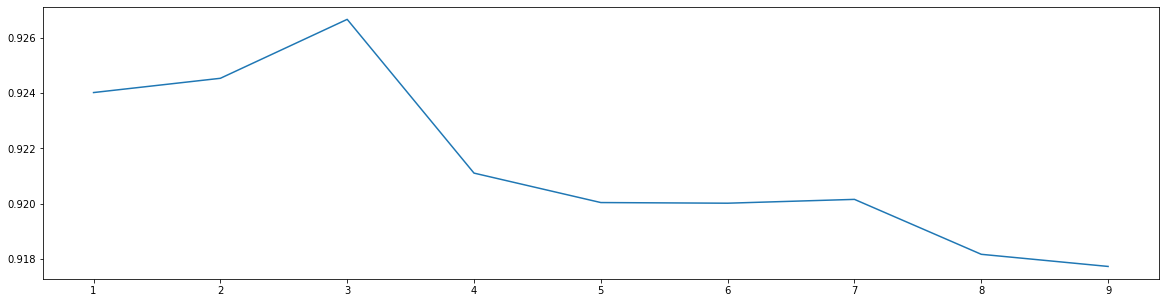

In [71]:
rf_score = []
for i in range(0,30):
    RF_CV = RandomForestClassifier(n_estimators=95, max_depth=8, min_samples_leaf=9, min_samples_split=19, 
                                   max_features=i+1, n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_b})
    score = cross_val_score(RF_CV,x_train_3_standard, y_train_3,cv=10, scoring='roc_auc').mean()
    rf_score.append(score)

print("最佳AUROC为：%.4f" % max(rf_score))
print("最佳max_features值：",([*range(1,31)][rf_score.index(max(rf_score))]))
plt.figure(figsize=[20,5])
plt.plot(range(1,31),rf_score)
plt.show()

In [72]:
# 尝试调整调整'max_features'
"""诱导低氧——术前+诱导变量"""
List_4 = {'max_features':np.arange(1,30,1)}
RF_S = RandomForestClassifier(**parameters_4)

Grid_Search_4 = GridSearchCV(RF_S, param_grid = List_4, scoring='roc_auc', cv=10)

Grid_Search_4.fit(x_train_4_standard, y_train_4)

joblib.dump(Grid_Search_4, "[2]Model_Save/[2]Model/[2]Induction/[2]/Grid Search/Grid_Search_RF_4.pkl")

print('模型最ROC_AUC:{:.3f}'.format(Grid_Search_4.best_score_))
print('最优“max_features”值为:{}'.format(Grid_Search_4.best_params_))

模型最ROC_AUC:0.935
最优“max_features”值为:{'max_features': 3}


最佳AUROC为：0.9355
最佳max_features值： 3


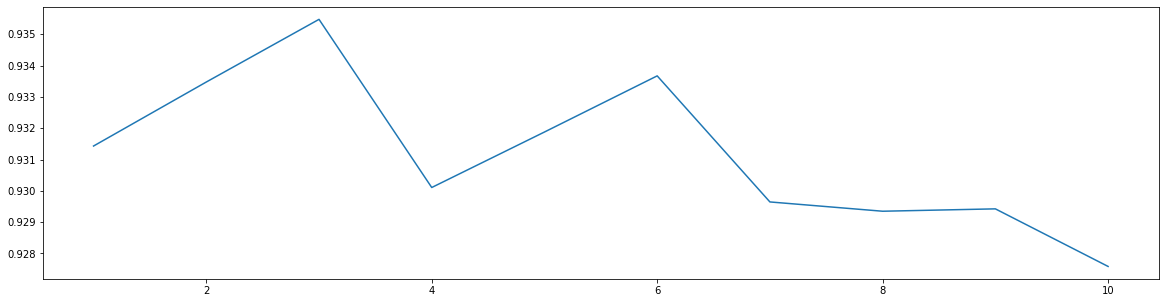

In [73]:
rf_score = []
for i in range(0,30):
    RF_CV = RandomForestClassifier(n_estimators=61, max_depth=7, min_samples_leaf=7, min_samples_split=16, 
                                   max_features=i+1, n_jobs=-1, random_state=42, class_weight={0:1, 1:weight_b})
    score = cross_val_score(RF_CV,x_train_4_standard, y_train_4,cv=10, scoring='roc_auc').mean()
    rf_score.append(score)

print("最佳AUROC为：%.4f" % max(rf_score))
print("最佳max_features值：",([*range(1,31)][rf_score.index(max(rf_score))]))
plt.figure(figsize=[20,5])
plt.plot(range(1,31),rf_score)
plt.show()

#### 6. 10折交叉验证

In [76]:
"""术中低氧——术前变量"""
# 采用10折交叉验证，验证模型

"""
最佳参数
========
"""
parameters_1 = {'n_estimators':80, 
                'max_depth':3, 
                'min_samples_leaf':7, 
                'min_samples_split':15, 
                'max_features':1, 
                'class_weight':{0:1, 1:weight_a}, 
                'random_state':42}


# 交叉验证30次
RF_Verification = RandomForestClassifier(**parameters_1)

k_rf = KFoldValidation(RF_Verification, x_train_1_standard, y_train_1, k=10)
k_rf.cycle(times=30)

,Cycle Times,训练集准确度,验证集准确度
0,1 st,0.857879,0.845898
1,2 nd,0.857878,0.85021
2,3 rd,0.857879,0.841597
3,4 th,0.857638,0.852373
4,5 th,0.858477,0.854535
5,6 th,0.859077,0.840556
6,7 th,0.858238,0.840568
7,8 th,0.859554,0.844799
8,9 th,0.856681,0.850234
9,10 th,0.858596,0.84162


In [245]:
"""术中低氧——术前+术中变量"""
# 采用10折交叉验证，验证模型

"""
最佳参数
========
"""
parameters_2 = {'n_estimators':92, 
                'max_depth':3, 
                'min_samples_leaf':8, 
                'min_samples_split':16, 
                'max_features':1, 
                'class_weight':{0:1, 1:weight_a}, 
                'random_state':42}


# 交叉验证30次
RF_Verification = RandomForestClassifier(**parameters_2)

k_rf = KFoldValidation(RF_Verification, x_train_2_standard, y_train_2, k=10)
k_rf.cycle(times=30)

,Cycle Times,训练集准确度,验证集准确度
0,1 st,0.881585,0.870652
1,2 nd,0.880269,0.868665
2,3 rd,0.882303,0.871751
3,4 th,0.881825,0.877104
4,5 th,0.884697,0.867356
5,6 th,0.882065,0.873913
6,7 th,0.881107,0.871821
7,8 th,0.882183,0.865194
8,9 th,0.880747,0.865299
9,10 th,0.882185,0.869565


In [91]:
"""诱导低氧——术前变量"""
# 采用10折交叉验证，验证模型

"""
最佳参数
========
"""
parameters_3 = {'n_estimators':95, 
                'max_depth':4, 
                'min_samples_leaf':9, 
                'min_samples_split':25, 
                'max_features':1, 
                'class_weight':{0:1, 1:weight_b}, 
                'random_state':42}

# 交叉验证30次
RF_Verification = RandomForestClassifier(**parameters_3)

k_rf = KFoldValidation(RF_Verification, x_train_3_standard, y_train_3, k=10)
k_rf.cycle(times=30)

,Cycle Times,训练集准确度,验证集准确度
0,1 st,0.863865,0.844834
1,2 nd,0.863625,0.851344
2,3 rd,0.864942,0.84377
3,4 th,0.864225,0.844881
4,5 th,0.863267,0.849182
5,6 th,0.86614,0.84695
6,7 th,0.864822,0.849112
7,8 th,0.864224,0.846973
8,9 th,0.863745,0.844892
9,10 th,0.865062,0.848036


In [298]:
"""诱导低氧——术前+诱导变量"""
# 采用10折交叉验证，验证模型

"""
最佳参数
========
"""
parameters_4 = {'n_estimators':61, 
                'max_depth':3, 
                'min_samples_leaf':10, 
                'min_samples_split':20, 
                'max_features':1, 
                'class_weight':{0:1, 1:weight_b}, 
                'random_state':42}


# 交叉验证30次
RF_Verification = RandomForestClassifier(**parameters_4)

k_rf = KFoldValidation(RF_Verification, x_train_4_standard, y_train_4, k=10)
k_rf.cycle(times=30)

,Cycle Times,训练集准确度,验证集准确度
0,1 st,0.877395,0.858918
1,2 nd,0.874042,0.870676
2,3 rd,0.876439,0.864259
3,4 th,0.872367,0.863079
4,5 th,0.875001,0.863114
5,6 th,0.874521,0.86205
6,7 th,0.876198,0.870699
7,8 th,0.876317,0.862097
8,9 th,0.875479,0.868537
9,10 th,0.872725,0.860951


#### 7. 模型的建立与评估

★ 术中低氧——术前变量 ★

In [77]:
"""参数表"""

parameters_1 = {'n_estimators':80, 
                'max_depth':3, 
                'min_samples_leaf':7, 
                'min_samples_split':15, 
                'max_features':1, 
                'class_weight':{0:1, 1:weight_a}, 
                'random_state':42}

RF = RandomForestClassifier(**parameters_1)

print("开始训练...")
RF.fit(x_train_1_standard, y_train_1)
joblib.dump(RF, "[2]Model_Save/[2]Model/[1]Intraoperative/[1]/RF.pkl")
print("训练完毕")

开始训练...
训练完毕


The Optimal Threshold：0.452

AUROC：0.948
95% CI for AUROC： 0.933 - 0.963
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.599
95% CI for AUPRC： 0.495 - 0.695
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.107

Hoslem-Lemeshow Test
HL-chi2：246.73997632130283
df：3.0000
P-value：0.0000

Sensitivity：0.978
Specifity：0.814
+LR：5.252
-LR：0.027
PPV：0.361
NPV：0.997
Accuracy：0.830
Precision：0.361
Recall：0.978
F1-Value：0.527
This confusion matrix is based on the threshold of 0.452



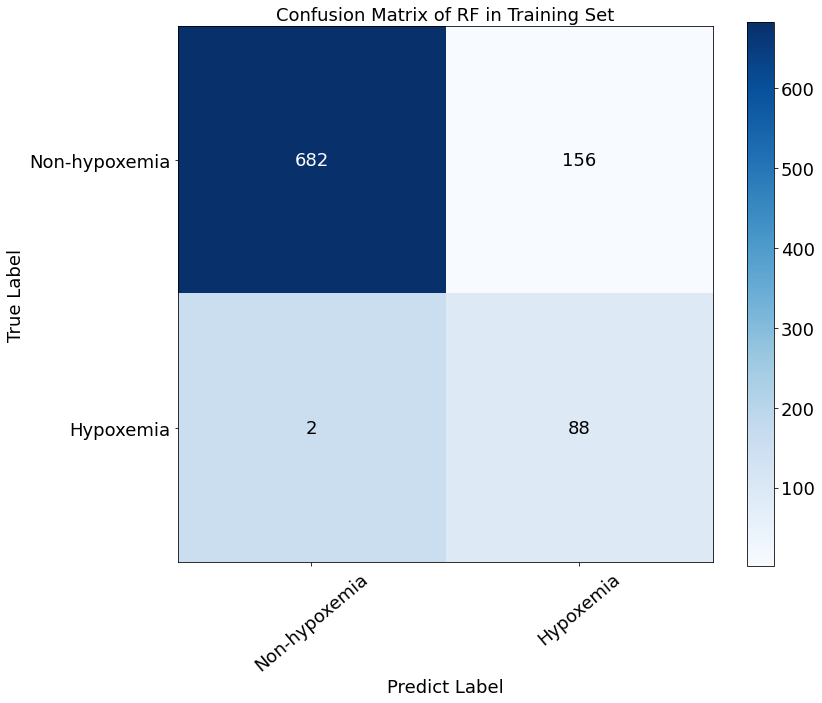

In [78]:
# 用约登指数校准模型的阈值
CM_RF_train = ConfusionMatrix(RF, x_train_1_standard, y_train_1, Optimal_Threshold='ROC', HL_test=5)
CM_RF_train.metrics()
CM_RF_train.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of RF in Training Set", 
                   reverse=True, Font_color_threshold=300)
CM_RF_train.plot()

The Threshold：0.452

AUROC：0.927
95% CI for AUROC： 0.885 - 0.969
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.568
95% CI for AUPRC： 0.361 - 0.753
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.108

Hoslem-Lemeshow Test
HL-chi2：58.6445673529047
df：3.0000
P-value：0.0000

Sensitivity：0.955
Specifity：0.805
+LR：4.889
-LR：0.056
PPV：0.339
NPV：0.994
Accuracy：0.819
Precision：0.339
Recall：0.955
F1-Value：0.500
This confusion matrix is based on the threshold of 0.452



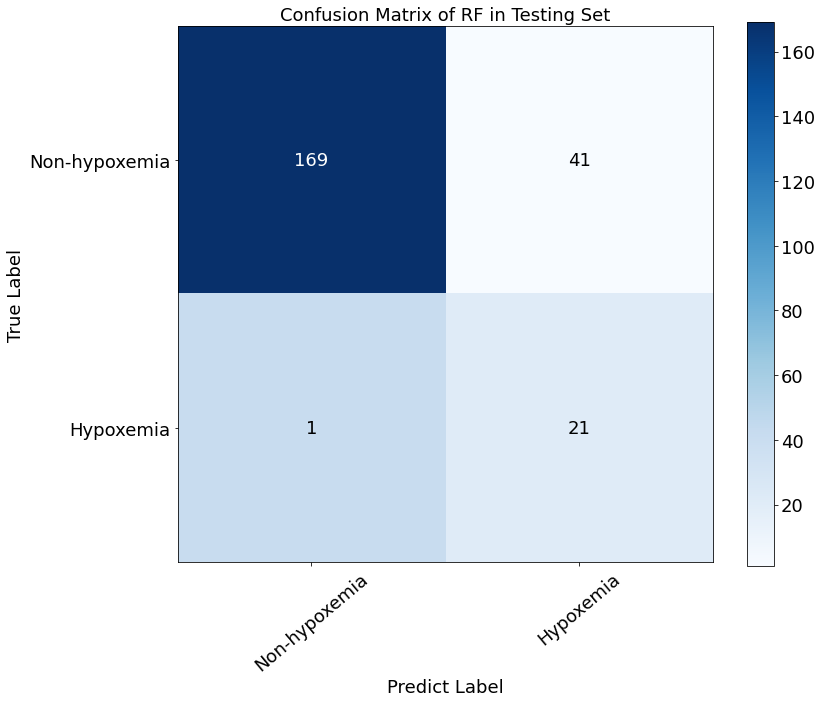

In [79]:
# 在最佳阈值下，定义测试集混淆矩阵
CM_RF = ConfusionMatrix(RF, x_test_1_standard, y_test_1, custom_threshold=CM_RF_train._threshold, HL_test=5)
CM_RF.metrics()
CM_RF.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of RF in Testing Set", 
             reverse=True, Font_color_threshold=100)
CM_RF.plot()

The Optimal Threshold：0.114

AUROC：0.947
95% CI for AUROC： 0.932 - 0.962
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.578
95% CI for AUPRC： 0.474 - 0.675
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.054

Hoslem-Lemeshow Test
HL-chi2：10.199813586235244
df：3.0000
P-value：0.0169

Sensitivity：0.956
Specifity：0.837
+LR：5.845
-LR：0.053
PPV：0.386
NPV：0.994
Accuracy：0.848
Precision：0.386
Recall：0.956
F1-Value：0.550
This confusion matrix is based on the threshold of 0.114



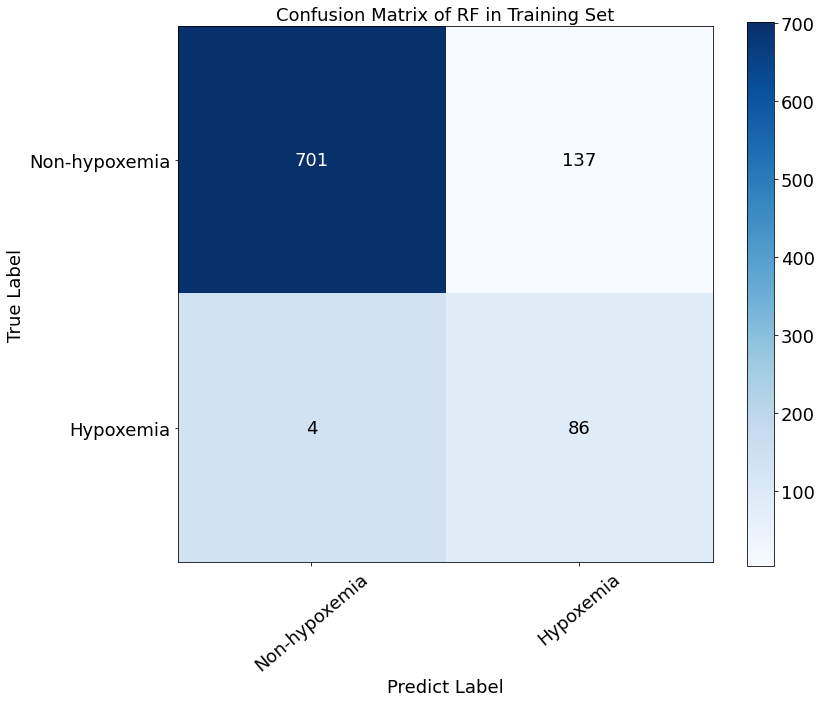

In [82]:
# 尝试校准并评估
RFC = CalibratedClassifierCV(RF, cv=10, method='sigmoid')
RFC.fit(x_train_1_standard, y_train_1)
CM_RFC_train = ConfusionMatrix(RFC, x_train_1_standard, y_train_1, Optimal_Threshold='ROC', HL_test=5)
CM_RFC_train.metrics()
CM_RFC_train.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of RF in Training Set", 
                    reverse=True, Font_color_threshold=300)
CM_RFC_train.plot()

The Threshold：0.114

AUROC：0.927
95% CI for AUROC： 0.885 - 0.969
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.564
95% CI for AUPRC： 0.358 - 0.750
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.059

Hoslem-Lemeshow Test
HL-chi2：0.968896291528522
df：3.0000
P-value：0.8088

Sensitivity：0.909
Specifity：0.819
+LR：5.024
-LR：0.111
PPV：0.345
NPV：0.989
Accuracy：0.828
Precision：0.345
Recall：0.909
F1-Value：0.500
This confusion matrix is based on the threshold of 0.114



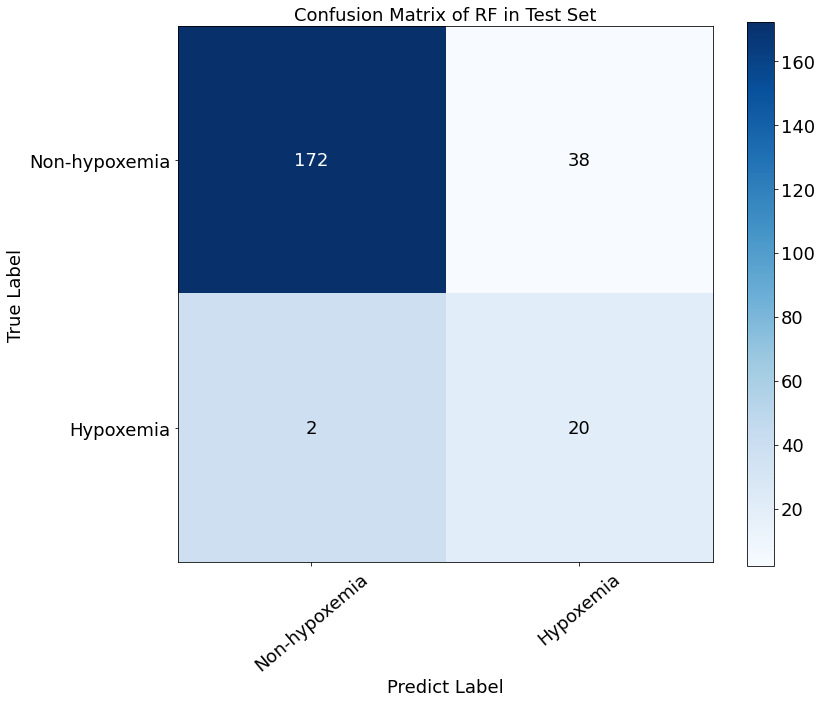

In [83]:
# 校准后，在最佳阈值下，定义测试集混淆矩阵
CM_RFC = ConfusionMatrix(RFC, x_test_1_standard, y_test_1, custom_threshold=CM_RFC_train._threshold, HL_test=5)
CM_RFC.metrics()
CM_RFC.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of RF in Test Set", 
              reverse=True, Font_color_threshold=100)
CM_RFC.plot()

In [86]:
# 保存校准后的模型
joblib.dump(RFC, "[2]Model_Save/[2]Model/[1]Intraoperative/[1]/RF_Calibration.pkl")
print("保存成功，保存地址为：[2]_Model_Save/[2]Model/[1]Intraoperative/[1]/RF_Calibration.pkl")

保存成功，保存地址为：[2]_Model_Save/[2]Model/[1]Intraoperative/[1]/RF_Calibration.pkl


★ 术中低氧——术前变量+术中变量 ★

In [43]:
"""参数表"""

parameters_2 = {'n_estimators':92, 
                'max_depth':3, 
                'min_samples_leaf':8, 
                'min_samples_split':16, 
                'max_features':1, 
                'class_weight':{0:1, 1:weight_a}, 
                'random_state':42}

RF = RandomForestClassifier(**parameters_2)

print("开始训练...")
RF.fit(x_train_2_standard, y_train_2)
joblib.dump(RF, "[2]Model_Save/[2]Model/[1]Intraoperative/[2]/RF.pkl")
print("训练完毕")

开始训练...
训练完毕


The Optimal Threshold：0.469

AUROC：0.956
95% CI for AUROC： 0.942 - 0.970
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.639
95% CI for AUPRC： 0.535 - 0.731
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.114

Hoslem-Lemeshow Test
HL-chi2：278.0409310849669
df：3.0000
P-value：0.0000

Sensitivity：0.967
Specifity：0.856
+LR：6.695
-LR：0.039
PPV：0.418
NPV：0.996
Accuracy：0.866
Precision：0.418
Recall：0.967
F1-Value：0.584
This confusion matrix is based on the threshold of 0.469



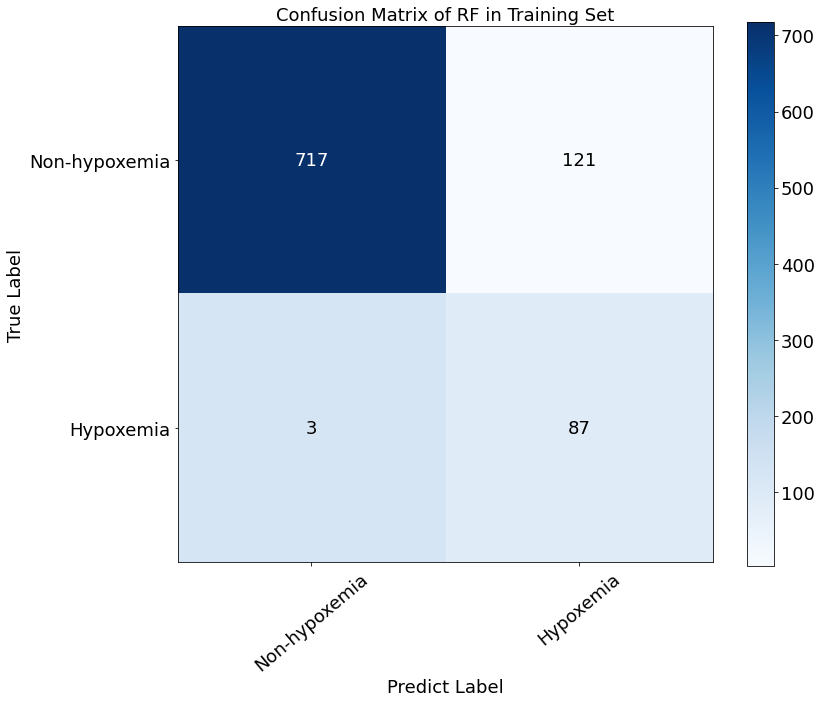

In [44]:
# 用约登指数校准模型的阈值
CM_RF_train = ConfusionMatrix(RF, x_train_2_standard, y_train_2, Optimal_Threshold='ROC', HL_test=5)
CM_RF_train.metrics()
CM_RF_train.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of RF in Training Set", 
                   reverse=True, Font_color_threshold=300)
CM_RF_train.plot()

The Threshold：0.469

AUROC：0.944
95% CI for AUROC： 0.911 - 0.976
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.533
95% CI for AUPRC： 0.331 - 0.725
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.113

Hoslem-Lemeshow Test
HL-chi2：66.39040125048282
df：3.0000
P-value：0.0000

Sensitivity：0.909
Specifity：0.833
+LR：5.455
-LR：0.109
PPV：0.364
NPV：0.989
Accuracy：0.841
Precision：0.364
Recall：0.909
F1-Value：0.519
This confusion matrix is based on the threshold of 0.469



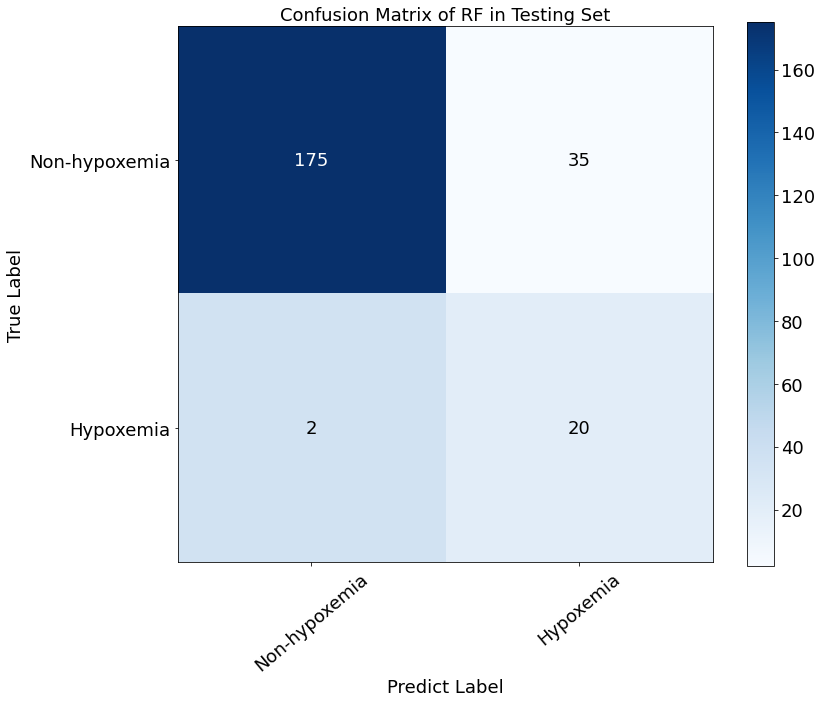

In [45]:
# 在最佳阈值下，定义测试集混淆矩阵
CM_RF = ConfusionMatrix(RF, x_test_2_standard, y_test_2, custom_threshold=CM_RF_train._threshold, HL_test=5)
CM_RF.metrics()
CM_RF.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of RF in Testing Set", 
             reverse=True, Font_color_threshold=100)
CM_RF.plot()

The Optimal Threshold：0.096

AUROC：0.955
95% CI for AUROC： 0.941 - 0.969
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.623
95% CI for AUPRC： 0.519 - 0.717
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.050

Hoslem-Lemeshow Test
HL-chi2：9.911941206315426
df：3.0000
P-value：0.0193

Sensitivity：0.978
Specifity：0.839
+LR：6.069
-LR：0.026
PPV：0.395
NPV：0.997
Accuracy：0.852
Precision：0.395
Recall：0.978
F1-Value：0.562
This confusion matrix is based on the threshold of 0.096



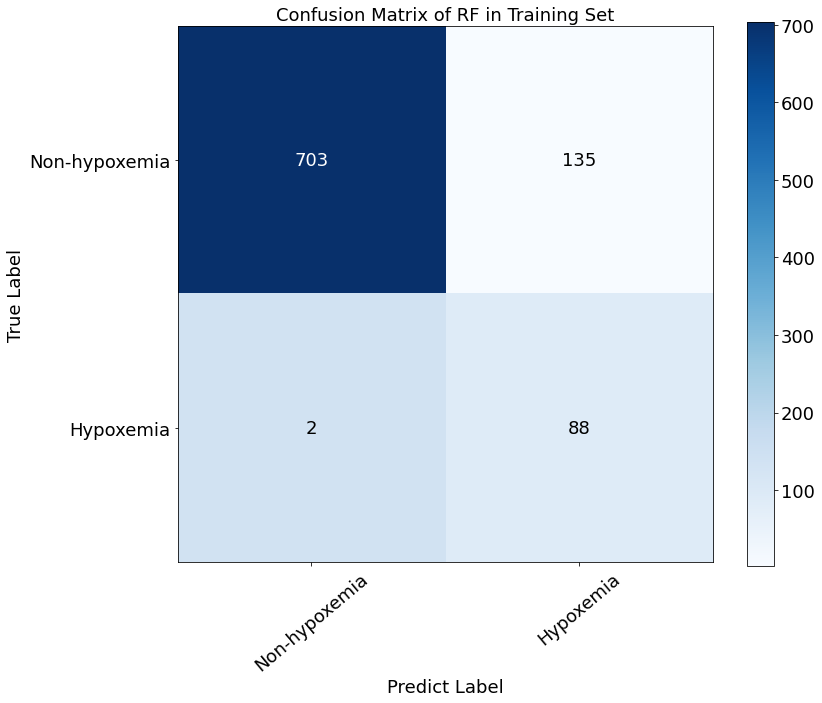

In [48]:
# 尝试校准并评估
RFC = CalibratedClassifierCV(RF, cv=10, method='sigmoid')
RFC.fit(x_train_2_standard, y_train_2)
CM_RFC_train = ConfusionMatrix(RFC, x_train_2_standard, y_train_2, Optimal_Threshold='ROC', HL_test=5)
CM_RFC_train.metrics()
CM_RFC_train.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of RF in Training Set", 
                    reverse=True, Font_color_threshold=300)
CM_RFC_train.plot()

The Threshold：0.096

AUROC：0.943
95% CI for AUROC： 0.910 - 0.975
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.522
95% CI for AUPRC： 0.321 - 0.716
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.054

Hoslem-Lemeshow Test
HL-chi2：1.877715603603377
df：3.0000
P-value：0.5982

Sensitivity：0.955
Specifity：0.829
+LR：5.568
-LR：0.055
PPV：0.368
NPV：0.994
Accuracy：0.841
Precision：0.368
Recall：0.955
F1-Value：0.532
This confusion matrix is based on the threshold of 0.096



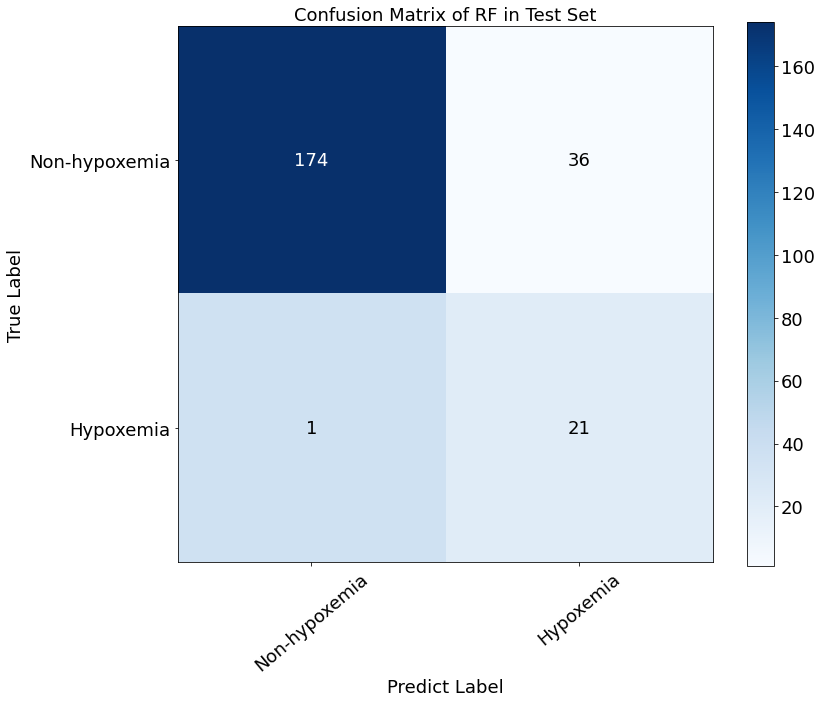

In [49]:
# 校准后，在最佳阈值下，定义测试集混淆矩阵
CM_RFC = ConfusionMatrix(RFC, x_test_2_standard, y_test_2, custom_threshold=CM_RFC_train._threshold, HL_test=5)
CM_RFC.metrics()
CM_RFC.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of RF in Test Set", 
              reverse=True, Font_color_threshold=100)
CM_RFC.plot()

In [52]:
# 保存校准后的模型
joblib.dump(RFC, "[2]Model_Save/[2]Model/[1]Intraoperative/[2]/RF_Calibration.pkl")
print("保存成功，保存地址为：[2]_Model_Save/[2]Model/[1]Intraoperative/[2]/RF_Calibration.pkl")

保存成功，保存地址为：[2]_Model_Save/[2]Model/[1]Intraoperative/[2]/RF_Calibration.pkl


★ 诱导低氧——术前变量 ★

In [53]:
"""参数表"""

parameters_3 = {'n_estimators':95, 
                'max_depth':4, 
                'min_samples_leaf':9, 
                'min_samples_split':25, 
                'max_features':1, 
                'class_weight':{0:1, 1:weight_b}, 
                'random_state':42}

RF = RandomForestClassifier(**parameters_3)

print("开始训练...")
RF.fit(x_train_3_standard, y_train_3)
joblib.dump(RF, "[2]Model_Save/[2]Model/[2]Induction/[1]/RF.pkl")
print("训练完毕")

开始训练...
训练完毕


The Optimal Threshold：0.455

AUROC：0.949
95% CI for AUROC： 0.934 - 0.964
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.557
95% CI for AUPRC： 0.448 - 0.660
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.100

Hoslem-Lemeshow Test
HL-chi2：232.73211839498123
df：3.0000
P-value：0.0000

Sensitivity：0.988
Specifity：0.827
+LR：5.724
-LR：0.015
PPV：0.357
NPV：0.999
Accuracy：0.842
Precision：0.357
Recall：0.988
F1-Value：0.524
This confusion matrix is based on the threshold of 0.455



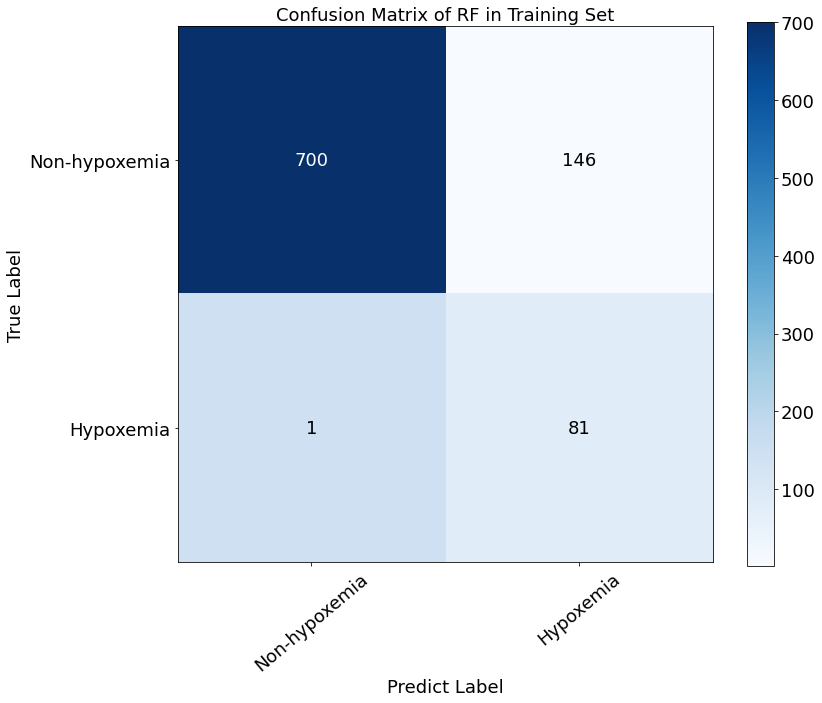

In [54]:
# 用约登指数校准模型的阈值
CM_RF_train = ConfusionMatrix(RF, x_train_3_standard, y_train_3, Optimal_Threshold='ROC', HL_test=5)
CM_RF_train.metrics()
CM_RF_train.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of RF in Training Set", 
                   reverse=True, Font_color_threshold=300)
CM_RF_train.plot()

The Threshold：0.455

AUROC：0.915
95% CI for AUROC： 0.867 - 0.962
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.493
95% CI for AUPRC： 0.288 - 0.700
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.106

Hoslem-Lemeshow Test
HL-chi2：56.204914152630415
df：3.0000
P-value：0.0000

Sensitivity：0.850
Specifity：0.807
+LR：4.395
-LR：0.186
PPV：0.293
NPV：0.983
Accuracy：0.810
Precision：0.293
Recall：0.850
F1-Value：0.436
This confusion matrix is based on the threshold of 0.455



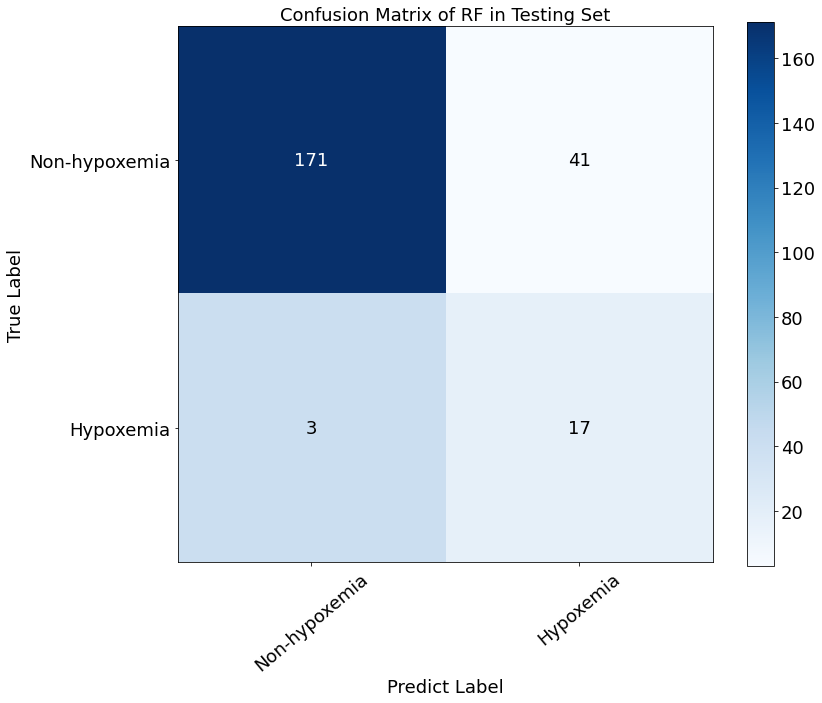

In [55]:
# 在最佳阈值下，定义测试集混淆矩阵
CM_RF = ConfusionMatrix(RF, x_test_3_standard, y_test_3, custom_threshold=CM_RF_train._threshold, HL_test=5)
CM_RF.metrics()
CM_RF.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of RF in Testing Set", 
             reverse=True, Font_color_threshold=100)
CM_RF.plot()

The Optimal Threshold：0.137

AUROC：0.949
95% CI for AUROC： 0.935 - 0.964
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.568
95% CI for AUPRC： 0.459 - 0.670
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.051

Hoslem-Lemeshow Test
HL-chi2：14.337667062405325
df：3.0000
P-value：0.0025

Sensitivity：0.951
Specifity：0.862
+LR：6.878
-LR：0.057
PPV：0.400
NPV：0.995
Accuracy：0.870
Precision：0.400
Recall：0.951
F1-Value：0.563
This confusion matrix is based on the threshold of 0.137



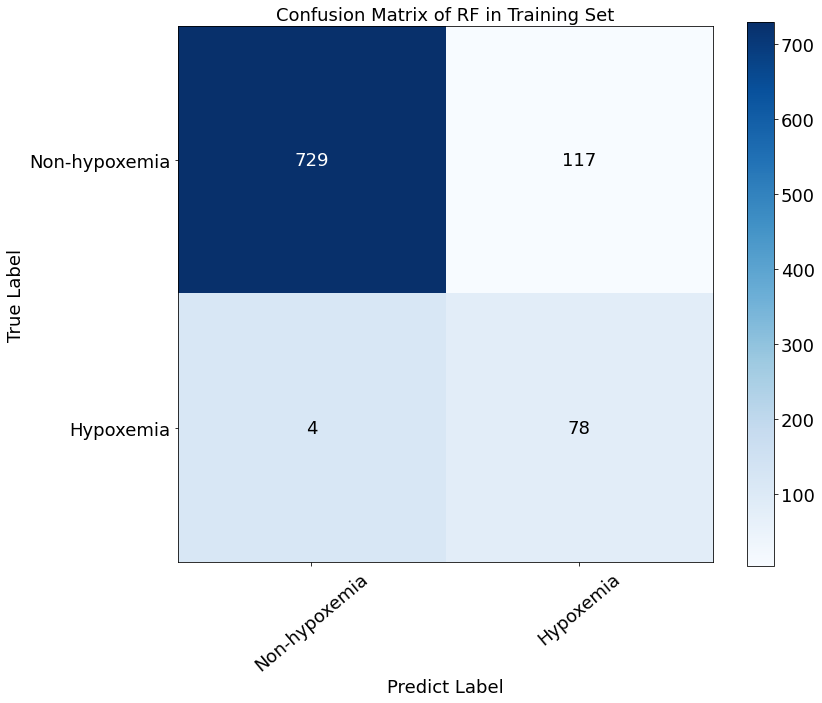

In [58]:
# 尝试校准并评估
RFC = CalibratedClassifierCV(RF, cv=10, method='sigmoid')
RFC.fit(x_train_3_standard, y_train_3)
CM_RFC_train = ConfusionMatrix(RFC, x_train_3_standard, y_train_3, Optimal_Threshold='ROC', HL_test=5)
CM_RFC_train.metrics()
CM_RFC_train.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of RF in Training Set", 
                    reverse=True, Font_color_threshold=300)
CM_RFC_train.plot()

The Threshold：0.137

AUROC：0.914
95% CI for AUROC： 0.866 - 0.962
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.490
95% CI for AUPRC： 0.285 - 0.697
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.057

Hoslem-Lemeshow Test
HL-chi2：2.0966701796211344
df：3.0000
P-value：0.5526

Sensitivity：0.800
Specifity：0.849
+LR：5.300
-LR：0.236
PPV：0.333
NPV：0.978
Accuracy：0.845
Precision：0.333
Recall：0.800
F1-Value：0.471
This confusion matrix is based on the threshold of 0.137



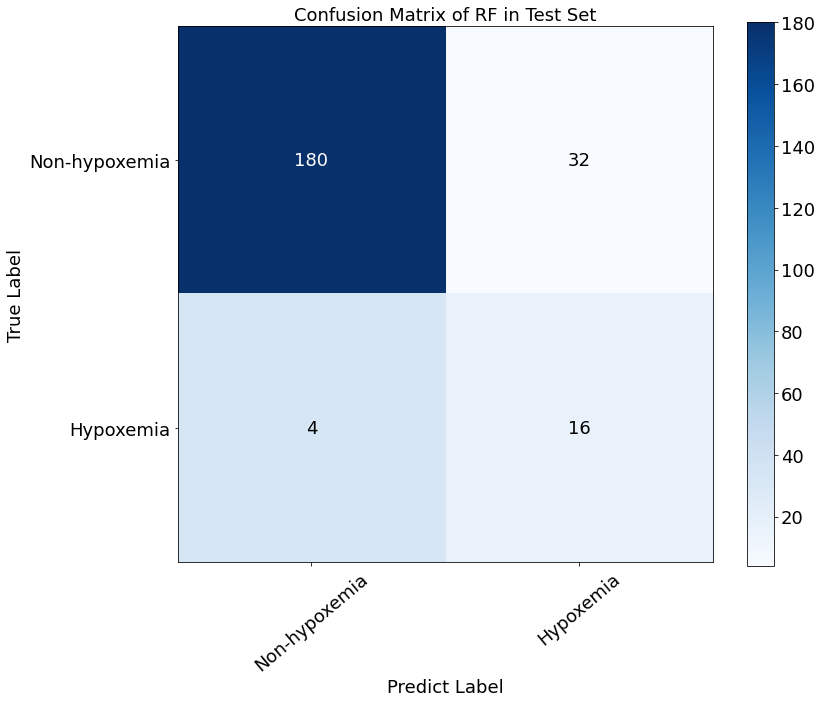

In [59]:
# 校准后，在最佳阈值下，定义测试集混淆矩阵
CM_RFC = ConfusionMatrix(RFC, x_test_3_standard, y_test_3, custom_threshold=CM_RFC_train._threshold, HL_test=5)
CM_RFC.metrics()
CM_RFC.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of RF in Test Set", 
              reverse=True, Font_color_threshold=100)
CM_RFC.plot()

In [62]:
# 保存校准后的模型
joblib.dump(RFC, "[2]Model_Save/[2]Model/[2]Induction/[1]/RF_Calibration.pkl")
print("保存成功，保存地址为：[2]_Model_Save/[2]Model/[2]Induction/[1]/RF_Calibration.pkl")

保存成功，保存地址为：[2]_Model_Save/[2]Model/[2]Induction/[1]/RF_Calibration.pkl


★ 诱导低氧——术前+诱导变量 ★

In [63]:
"""参数表"""

parameters_4 = {'n_estimators':61, 
                'max_depth':3, 
                'min_samples_leaf':10, 
                'min_samples_split':20, 
                'max_features':1, 
                'class_weight':{0:1, 1:weight_b}, 
                'random_state':42}

RF = RandomForestClassifier(**parameters_4)

print("开始训练...")
RF.fit(x_train_4_standard, y_train_4)
joblib.dump(RF, "[2]Model_Save/[2]Model/[2]Induction/[2]/RF.pkl")
print("训练完毕")

开始训练...
训练完毕


The Optimal Threshold：0.457

AUROC：0.953
95% CI for AUROC： 0.939 - 0.967
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.566
95% CI for AUPRC： 0.458 - 0.669
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.105

Hoslem-Lemeshow Test
HL-chi2：259.6037594198451
df：3.0000
P-value：0.0000

Sensitivity：0.963
Specifity：0.845
+LR：6.222
-LR：0.043
PPV：0.376
NPV：0.996
Accuracy：0.856
Precision：0.376
Recall：0.963
F1-Value：0.541
This confusion matrix is based on the threshold of 0.457



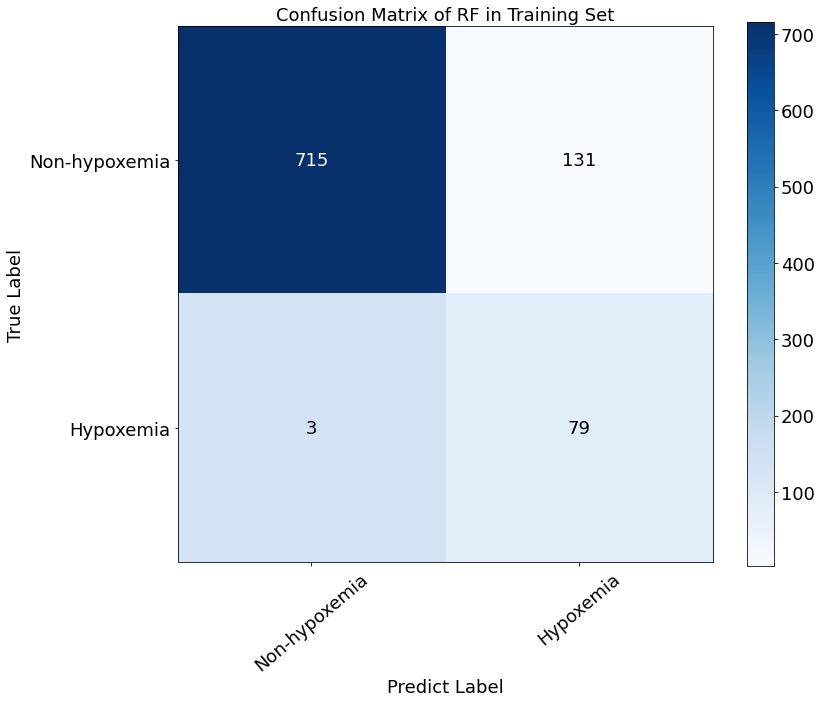

In [64]:
# 用约登指数校准模型的阈值
CM_RF_train = ConfusionMatrix(RF, x_train_4_standard, y_train_4, Optimal_Threshold='ROC', HL_test=5)
CM_RF_train.metrics()
CM_RF_train.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of RF in Training Set", 
                   reverse=True, Font_color_threshold=300)
CM_RF_train.plot()

The Threshold：0.457

AUROC：0.930
95% CI for AUROC： 0.894 - 0.967
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.398
95% CI for AUPRC： 0.212 - 0.618
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.106

Hoslem-Lemeshow Test
HL-chi2：60.610290121720546
df：3.0000
P-value：0.0000

Sensitivity：0.900
Specifity：0.830
+LR：5.300
-LR：0.120
PPV：0.333
NPV：0.989
Accuracy：0.836
Precision：0.333
Recall：0.900
F1-Value：0.486
This confusion matrix is based on the threshold of 0.457



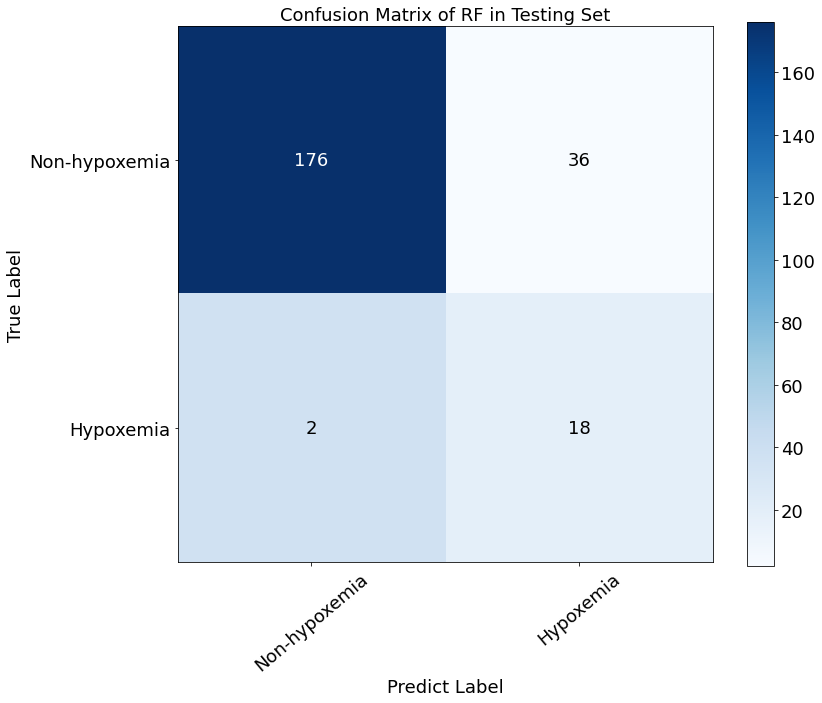

In [65]:
# 在最佳阈值下，定义测试集混淆矩阵
CM_RF = ConfusionMatrix(RF, x_test_4_standard, y_test_4, custom_threshold=CM_RF_train._threshold, HL_test=5)
CM_RF.metrics()
CM_RF.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of RF in Testing Set", 
             reverse=True, Font_color_threshold=100)
CM_RF.plot()

The Optimal Threshold：0.105

AUROC：0.952
95% CI for AUROC： 0.937 - 0.966
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.577
95% CI for AUPRC： 0.468 - 0.679
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.049

Hoslem-Lemeshow Test
HL-chi2：10.920664098327302
df：3.0000
P-value：0.0122

Sensitivity：0.963
Specifity：0.850
+LR：6.418
-LR：0.043
PPV：0.383
NPV：0.996
Accuracy：0.860
Precision：0.383
Recall：0.963
F1-Value：0.549
This confusion matrix is based on the threshold of 0.105



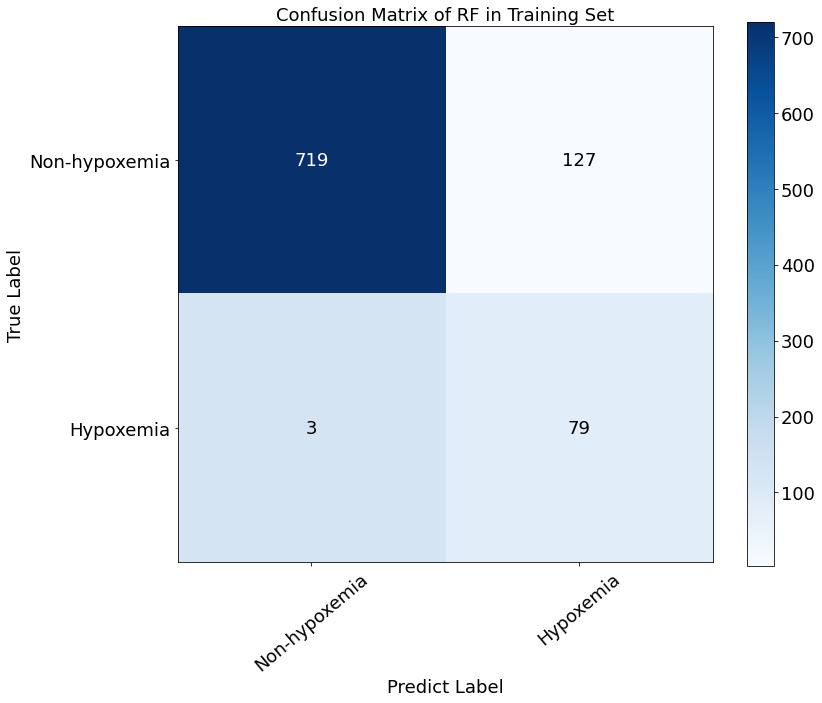

In [68]:
# 尝试校准并评估
RFC = CalibratedClassifierCV(RF, cv=10, method='sigmoid')
RFC.fit(x_train_4_standard, y_train_4)
CM_RFC_train = ConfusionMatrix(RFC, x_train_4_standard, y_train_4, Optimal_Threshold='ROC', HL_test=5)
CM_RFC_train.metrics()
CM_RFC_train.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of RF in Training Set", 
                    reverse=True, Font_color_threshold=300)
CM_RFC_train.plot()

The Threshold：0.105

AUROC：0.929
95% CI for AUROC： 0.892 - 0.966
---------
NOTE: The Confidence Interval for AUROC was Calculated by Delong Method (Delong et al, 1988)
---------

AUPRC：0.393
95% CI for AUPRC： 0.209 - 0.613
---------
NOTE: The Confidence Interval for AUPRC was Calculated by Logit Method (Boyd et al, 2013)
---------

Brier Score：0.058

Hoslem-Lemeshow Test
HL-chi2：2.7406203976292707
df：3.0000
P-value：0.4334

Sensitivity：0.900
Specifity：0.816
+LR：4.892
-LR：0.123
PPV：0.316
NPV：0.989
Accuracy：0.823
Precision：0.316
Recall：0.900
F1-Value：0.468
This confusion matrix is based on the threshold of 0.105



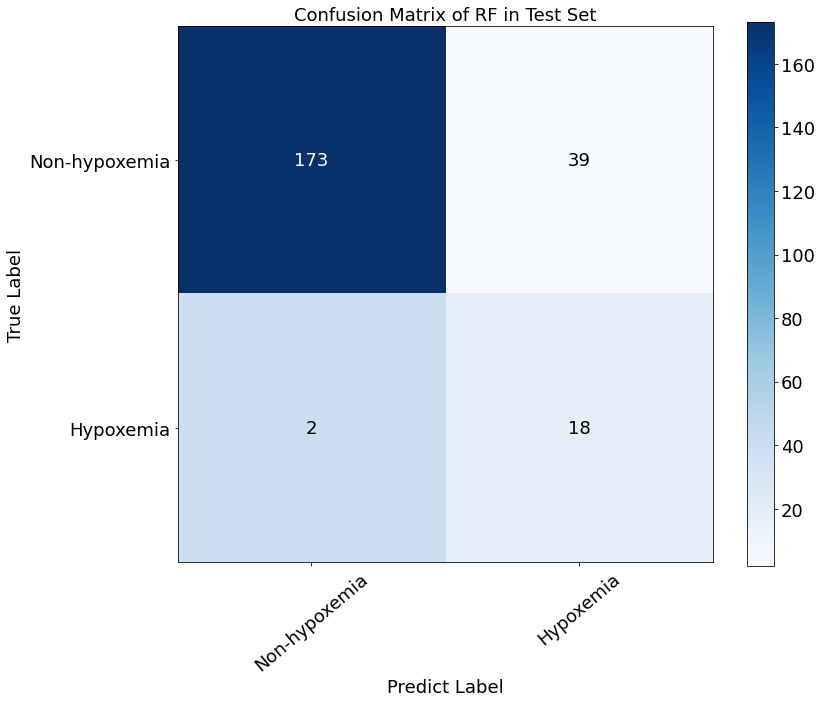

In [69]:
# 校准后，在最佳阈值下，定义测试集混淆矩阵
CM_RFC = ConfusionMatrix(RFC, x_test_4_standard, y_test_4, custom_threshold=CM_RFC_train._threshold, HL_test=5)
CM_RFC.metrics()
CM_RFC.cm_set(class_tag=["Hypoxemia", "Non-hypoxemia"], title="Confusion Matrix of RF in Test Set", 
              reverse=True, Font_color_threshold=100)
CM_RFC.plot()

In [72]:
# 保存校准后的模型
joblib.dump(RFC, "[2]Model_Save/[2]Model/[2]Induction/[2]/RF_Calibration.pkl")
print("保存成功，保存地址为：[2]_Model_Save/[2]Model/[2]Induction/[2]/RF_Calibration.pkl")

保存成功，保存地址为：[2]_Model_Save/[2]Model/[2]Induction/[2]/RF_Calibration.pkl


# ---End---